In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import glob

import time
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
from IPython.display import Image
from skimage import io

import tensorflow as tf
import keras
from skimage.color import rgb2gray
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint,LearningRateScheduler
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
# from tensorflow.keras.layers import preprocessing
# from tensorflow.keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras import preprocessing

from sklearn.model_selection import train_test_split
import cv2
from sklearn.preprocessing import StandardScaler, normalize
from IPython.display import display
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Convolution2D,BatchNormalization,ReLU,LeakyReLU,Add,Activation
from tensorflow.keras.layers import GlobalAveragePooling2D,AveragePooling2D,UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from tqdm import tqdm
import random
import glob
import cv2
from skimage import io
from skimage.transform import resize
from sklearn.model_selection import train_test_split

2024-07-23 16:03:16.197637: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 16:03:16.197762: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 16:03:16.335492: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
tf.__version__, keras.__version__

('2.15.0', '3.4.1')

In [3]:
Brain_data = pd.read_csv('../input/lgg-mri-segmentation/kaggle_3m/data.csv')
Brain_data.head()

Patient  RNASeqCluster  MethylationCluster  miRNACluster  CNCluster  \
0  TCGA_CS_4941            2.0                 4.0             2        2.0   
1  TCGA_CS_4942            1.0                 5.0             2        1.0   
2  TCGA_CS_4943            1.0                 5.0             2        1.0   
3  TCGA_CS_4944            NaN                 5.0             2        1.0   
4  TCGA_CS_5393            4.0                 5.0             2        1.0   

   RPPACluster  OncosignCluster  COCCluster  histological_type  \
0          NaN              3.0           2                1.0   
1          1.0              2.0           1                1.0   
2          2.0              2.0           1                1.0   
3          2.0              1.0           1                1.0   
4          2.0              3.0           1                1.0   

   neoplasm_histologic_grade  tumor_tissue_site  laterality  tumor_location  \
0                        2.0                1.0         3.0             2.0   
1                        2.0                1.0         3.0             2.0   
2                        2.0                1.0         1.0             2.0   
3                        1.0                1.0         3.0             6.0   
4                        2.0                1.0         1.0             6.0   

   gender  age_at_initial_pathologic  race  ethnicity  death01  
0     2.0                       67.0   3.0        2.0      1.0  
1     1.0                       44.0   2.0        NaN      1.0  
2     2.0                       37.0   3.0        NaN      0.0  
3     2.0                       50.0   3.0        NaN      0.0  
4     2.0                       39.0   3.0        NaN      0.0

In [4]:
Brain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

In [5]:
Brain_data.head(10)

Patient  RNASeqCluster  MethylationCluster  miRNACluster  CNCluster  \
0  TCGA_CS_4941            2.0                 4.0             2        2.0   
1  TCGA_CS_4942            1.0                 5.0             2        1.0   
2  TCGA_CS_4943            1.0                 5.0             2        1.0   
3  TCGA_CS_4944            NaN                 5.0             2        1.0   
4  TCGA_CS_5393            4.0                 5.0             2        1.0   
5  TCGA_CS_5395            2.0                 4.0             2        2.0   
6  TCGA_CS_5396            3.0                 3.0             2        3.0   
7  TCGA_CS_5397            NaN                 4.0             1        2.0   
8  TCGA_CS_6186            2.0                 4.0             1        2.0   
9  TCGA_CS_6188            2.0                 4.0             3        2.0   

   RPPACluster  OncosignCluster  COCCluster  histological_type  \
0          NaN              3.0           2                1.0   
1          1.0              2.0           1                1.0   
2          2.0              2.0           1                1.0   
3          2.0              1.0           1                1.0   
4          2.0              3.0           1                1.0   
5          NaN              3.0           2                3.0   
6          2.0              2.0           3                3.0   
7          3.0              3.0           2                1.0   
8          1.0              3.0           2                2.0   
9          3.0              3.0           2                1.0   

   neoplasm_histologic_grade  tumor_tissue_site  laterality  tumor_location  \
0                        2.0                1.0         3.0             2.0   
1                        2.0                1.0         3.0             2.0   
2                        2.0                1.0         1.0             2.0   
3                        1.0                1.0         3.0             6.0   
4                        2.0                1.0         1.0             6.0   
5                        1.0                1.0         3.0             5.0   
6                        2.0                1.0         3.0             2.0   
7                        2.0                1.0         1.0             6.0   
8                        2.0                1.0         3.0             2.0   
9                        2.0                1.0         3.0             6.0   

   gender  age_at_initial_pathologic  race  ethnicity  death01  
0     2.0                       67.0   3.0        2.0      1.0  
1     1.0                       44.0   2.0        NaN      1.0  
2     2.0                       37.0   3.0        NaN      0.0  
3     2.0                       50.0   3.0        NaN      0.0  
4     2.0                       39.0   3.0        NaN      0.0  
5     2.0                       43.0   2.0        NaN      1.0  
6     1.0                       53.0   3.0        2.0      0.0  
7     1.0                       54.0   3.0        2.0      1.0  
8     2.0                       58.0   3.0        2.0      1.0  
9     2.0                       48.0   3.0        2.0      0.0

In [6]:
Data_path = []
for sub_dir_path in glob.glob("/kaggle/input/lgg-mri-segmentation/kaggle_3m/"+"*"):
    try:
        dir_name = sub_dir_path.split('/')[-1]
        for filename in os.listdir(sub_dir_path):
            mask_path = sub_dir_path + '/' + filename
            Data_path.extend([dir_name, mask_path])
    except Exception as e:
        print(e)

[Errno 20] Not a directory: '/kaggle/input/lgg-mri-segmentation/kaggle_3m/README.md'
[Errno 20] Not a directory: '/kaggle/input/lgg-mri-segmentation/kaggle_3m/data.csv'


In [7]:
filenames = Data_path[::2]
masks = Data_path[1::2]

In [8]:
Data_mri = pd.DataFrame(data = {"Patient_ID": filenames, "img_path": masks})
Data_mri

Patient_ID                                           img_path
0     TCGA_DU_7010_19860307  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
1     TCGA_DU_7010_19860307  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
2     TCGA_DU_7010_19860307  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
3     TCGA_DU_7010_19860307  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
4     TCGA_DU_7010_19860307  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
...                     ...                                                ...
7853  TCGA_DU_7306_19930512  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
7854  TCGA_DU_7306_19930512  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
7855  TCGA_DU_7306_19930512  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
7856  TCGA_DU_7306_19930512  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
7857  TCGA_DU_7306_19930512  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...

[7858 rows x 2 columns]

In [9]:
Original_Img = Data_mri[~Data_mri['img_path'].str.contains("mask")]
Mask_Img = Data_mri[Data_mri['img_path'].str.contains("mask")]

In [10]:
Original_Img, Mask_Img

(                 Patient_ID                                           img_path
 0     TCGA_DU_7010_19860307  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
 2     TCGA_DU_7010_19860307  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
 3     TCGA_DU_7010_19860307  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
 4     TCGA_DU_7010_19860307  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
 5     TCGA_DU_7010_19860307  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
 ...                     ...                                                ...
 7849  TCGA_DU_7306_19930512  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
 7850  TCGA_DU_7306_19930512  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
 7852  TCGA_DU_7306_19930512  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
 7854  TCGA_DU_7306_19930512  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
 7856  TCGA_DU_7306_19930512  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...
 
 [3929 rows x 2 columns],
            

In [11]:
Main_Len = len("/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_")
Main_Len

89

In [12]:
End_Img_Len  = 4
End_Mask_Len = 9

In [13]:

# Imgs = sorted(Original_Img["Img_path"].values, key=lambda x : int(x[89:-4]))
# Masks = sorted(Mask_Img["Img_path"].values, key=lambda x : int(x[90:-9]))

Imgs = sorted(Original_Img["img_path"].values, key=lambda x : int(x[Main_Len:-End_Img_Len]))
Masks = sorted(Mask_Img["img_path"].values, key=lambda x : int(x[Main_Len:-End_Mask_Len]))



idx = random.randint(0, len(Imgs)-1)
print("Image path:", Imgs[idx], "\nMask path:", Masks[idx])

Image path: /kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_HT_8563_19981209/TCGA_HT_8563_19981209_13.tif 
Mask path: /kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_HT_8563_19981209/TCGA_HT_8563_19981209_13_mask.tif


In [14]:
Brain_MRI_Final = pd.DataFrame({

        "Patient_Id": Original_Img.Patient_ID.values,
        "img_path": Imgs,
        "mask_path": Masks,    
})

In [15]:
Brain_MRI_Final

Patient_Id  \
0     TCGA_DU_7010_19860307   
1     TCGA_DU_7010_19860307   
2     TCGA_DU_7010_19860307   
3     TCGA_DU_7010_19860307   
4     TCGA_DU_7010_19860307   
...                     ...   
3924  TCGA_DU_7306_19930512   
3925  TCGA_DU_7306_19930512   
3926  TCGA_DU_7306_19930512   
3927  TCGA_DU_7306_19930512   
3928  TCGA_DU_7306_19930512   

                                               img_path  \
0     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
1     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
2     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
4     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
...                                                 ...   
3924  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3925  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3926  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3927  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3928  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   

                                              mask_path  
0     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...  
1     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...  
2     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...  
3     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...  
4     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...  
...                                                 ...  
3924  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...  
3925  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...  
3926  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...  
3927  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...  
3928  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...  

[3929 rows x 3 columns]

In [16]:
def diagnosis_pos_neg(Image_Path):
    value = np.max(cv2.imread(Image_Path))
    if value > 0:
        return 1
    else:
        return 0
    
    
    
Brain_MRI_Final['mask'] = Brain_MRI_Final['mask_path'].apply(lambda x:diagnosis_pos_neg(x))

Brain_MRI_Final['mask_path'] = Brain_MRI_Final['mask_path'].apply(lambda x: str(x))

Brain_MRI_Final

Patient_Id  \
0     TCGA_DU_7010_19860307   
1     TCGA_DU_7010_19860307   
2     TCGA_DU_7010_19860307   
3     TCGA_DU_7010_19860307   
4     TCGA_DU_7010_19860307   
...                     ...   
3924  TCGA_DU_7306_19930512   
3925  TCGA_DU_7306_19930512   
3926  TCGA_DU_7306_19930512   
3927  TCGA_DU_7306_19930512   
3928  TCGA_DU_7306_19930512   

                                               img_path  \
0     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
1     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
2     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
4     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
...                                                 ...   
3924  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3925  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3926  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3927  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3928  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   

                                              mask_path  mask  
0     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
1     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
2     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
3     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
4     /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
...                                                 ...   ...  
3924  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
3925  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
3926  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
3927  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
3928  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  

[3929 rows x 4 columns]

In [17]:
Brain_MRI_Final.drop(columns=['Patient_Id'],inplace=True)

Brain_MRI_Final.head()

img_path  \
0  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
1  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
2  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
4  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   

                                           mask_path  mask  
0  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
1  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
2  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
3  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
4  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0

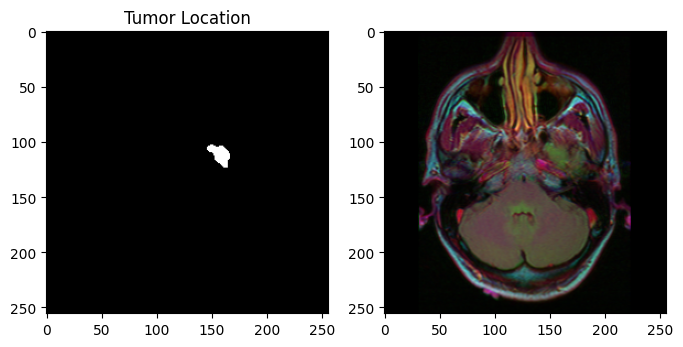

In [18]:
for i in range(len(Brain_MRI_Final)):
    if cv2.imread(Brain_MRI_Final.mask_path[i]).max() > 0:
        break

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(cv2.imread(Brain_MRI_Final.mask_path[i]))
plt.title('Tumor Location')

plt.subplot(1,2,2)
plt.imshow(cv2.imread(Brain_MRI_Final.img_path[i]))

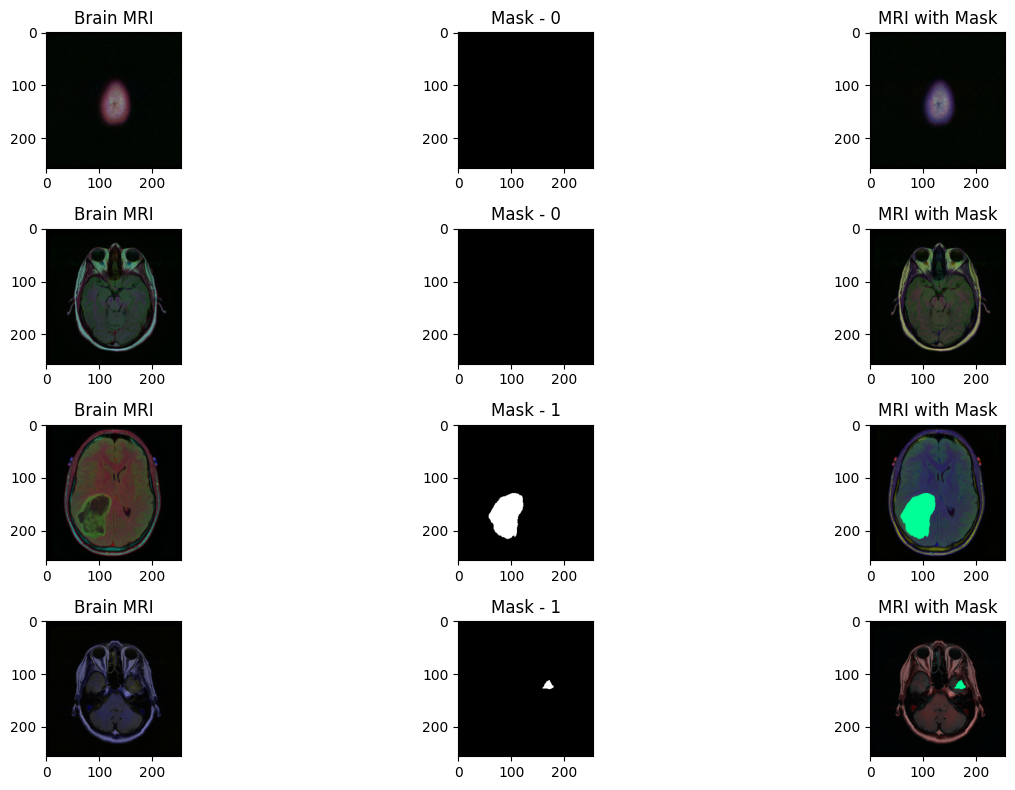

In [19]:
fig, axs = plt.subplots(4,3, figsize=(14,8))
count = 0
for x in range(4):
    i = 0
    while(True):
        i = random.randint(0, len(Brain_MRI_Final)) # select a random index
        if(Brain_MRI_Final['mask'][i] == 0): count+=1
        if(count > 2 and Brain_MRI_Final['mask'][i] == 0): continue
        break
        
    img = io.imread(Brain_MRI_Final.img_path[i])
    mask = io.imread(Brain_MRI_Final.mask_path[i])
    axs[x][0].title.set_text("Brain MRI") # set title
    axs[x][0].imshow(cv2.imread(Brain_MRI_Final.img_path[i])) # showing the MRI 
    axs[x][1].title.set_text("Mask - " + str(Brain_MRI_Final['mask'][i])) # plot title on the mask (0 or 1)
    axs[x][1].imshow(cv2.imread(Brain_MRI_Final.mask_path[i])) # Showing the corresponding mask    
    img[mask == 255] = (0,255,150)  # change pixel color at the position of the mask
    axs[x][2].title.set_text("MRI with Mask")
    axs[x][2].imshow(img)
    
    
fig.tight_layout()

In [20]:
!pip install Keras-Preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00


In [21]:
from keras_preprocessing.image import ImageDataGenerator

In [22]:
MRI_Train, MRI_Test = train_test_split(Brain_MRI_Final, test_size = 0.1, random_state=0)
MRI_Train, MRI_Vald = train_test_split(MRI_Train, test_size = 0.2, random_state=0)

print('Training data shape is {0}'.format(MRI_Train.values.shape))
print('Test data shape is {0}'.format(MRI_Test.values.shape))
print('Validation data shape is {0}'.format(MRI_Vald.values.shape))

MRI_Train.sample(n=5)

Training data shape is (2828, 3)
Test data shape is (393, 3)
Validation data shape is (708, 3)


img_path  \
1739  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3257  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
1622  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
2873  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
335   /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   

                                              mask_path  mask  
1739  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     1  
3257  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     1  
1622  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0  
2873  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     1  
335   /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0

In [23]:
def data_preprocessor(img, mask):
    img = img / 255
    mask  = mask / 255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    
    return (img, mask)

In [24]:
def Image_augmentation(data_frame, batch_size, aug_dict,
        image_color_mode = "rgb",             
        mask_color_mode = "grayscale",
        image_save_prefix = "image",
        mask_save_prefix = "mask",
        save_to_dir = None,
        target_size= (128, 128),
        seed=1):
    

    Image_Datagen = ImageDataGenerator(**aug_dict)
    Mask_Datagen = ImageDataGenerator(**aug_dict)
    
    Image_Generator = Image_Datagen.flow_from_dataframe(
        data_frame,
        x_col = "img_path",
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)

    Mask_Generator = Mask_Datagen.flow_from_dataframe(
        data_frame,
        x_col = "mask_path",
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)

    train_aug = zip(Image_Generator, Mask_Generator)
    
    for (img, mask) in train_aug:
        img, mask = data_preprocessor(img, mask)
        yield (img,mask)

In [25]:
train_generator_args = dict(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest')

train_gen = Image_augmentation(MRI_Train, 32,
                                train_generator_args,
                                target_size=(128, 128))
    
vald_gen = Image_augmentation(MRI_Vald, 32,
                                dict(),
                                target_size=(128, 128))

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Convolution2D, BatchNormalization, LeakyReLU, Add, ReLU, GlobalAveragePooling2D, AveragePooling2D, UpSampling2D, Activation

In [27]:
## PSP NET model archietecture 


## building the model PSP Net

def CONV_BLOCK(X, filters, Block, dropout_rate=0.3):
    b = 'Block_' + str(Block) + '_'
    f1, f2, f3 = filters
    X_Skip = X

    #block a
    X = Convolution2D(filters = f1, kernel_size=(1,1), dilation_rate = (1,1), padding='same', kernel_initializer = 'he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01), name = b+'a')(X)
    
    X = BatchNormalization(name = b + 'batch_norm_a')(X)
    X = LeakyReLU(alpha=0.2, name = b + 'leakyrelu_a')(X)
    
#     X = Convolution2D(filters=f1, kernel_size=(1, 1), dilation_rate=(1, 1), padding='same', kernel_initializer='he_normal', name=b+'a')(X)
#     X = BatchNormalization(name=b + 'batch_norm_a')(X)
#     X = LeakyReLU(alpha=0.2, name=b + 'leakyrelu_a')(X)

    

    #block b
    X = Convolution2D(filters = f2, kernel_size = (3,3), dilation_rate = (2,2), padding ='same', kernel_initializer ='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01),name=b+'b')(X)
    X = BatchNormalization(name = b + 'batch_norm_b')(X)
    X = LeakyReLU(alpha=0.2,name = b + 'leakyrelu_b')(X)
    
#     X = Convolution2D(filters=f2, kernel_size=(3, 3), dilation_rate=(2, 2), padding='same', kernel_initializer='he_normal', name=b+'b')(X)
#     X = BatchNormalization(name=b + 'batch_norm_b')(X)
#     X = LeakyReLU(alpha=0.2, name=b + 'leakyrelu_b')(X)

    #block c
    X = Convolution2D(filters = f3, kernel_size=(1,1), dilation_rate = (1,1), padding = 'same',kernel_initializer = 'he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01), name = b+'c')(X)
    X = BatchNormalization(name = b +'batch_norm_c')(X)
    
#     X = Convolution2D(filters=f3, kernel_size=(1, 1), dilation_rate=(1, 1), padding='same', kernel_initializer='he_normal', name=b+'c')(X)
#     X = BatchNormalization(name=b + 'batch_norm_c')(X)

    # skip_conv connection
#     X_Skip = Convolution2D(filters = f3, kernel_size = (3,3), padding ='same', name = b+'skip_conv')(X_Skip)
#     X_Skip = BatchNormalization(name = b+ 'batch_norm_skip_conv')(X_Skip)
    
    X_Skip = Convolution2D(filters=f3, kernel_size=(1, 1), padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01), name=b+'skip_conv')(X_Skip)
    X_Skip = BatchNormalization(name=b + 'batch_norm_skip_conv')(X_Skip)

    # block_c + skip_conv
    X = Add(name = b+'add')([X , X_Skip])
    X = ReLU(name = b +'relu')(X)
    return X


def Base_Feature_Maps(Input_Layer, dropout_rate=0.3):
    # base covolution module to get input image feature maps 
    
    # block_1
#     base = CONV_BLOCK(Input_Layer, [32, 32, 64], '1')
    base = CONV_BLOCK(Input_Layer, [16, 16, 32], '1', dropout_rate)
    
    # block_2
#     base = CONV_BLOCK(base, [64, 64, 128], '2')
    base = CONV_BLOCK(base, [32, 32, 64], '2', dropout_rate)
    
    # block_3
#     base = CONV_BLOCK(base, [128, 128, 256], '3')
    base = CONV_BLOCK(base, [64, 64, 128], '3', dropout_rate)
    
    return base



def Pyramid_Feature(Input_Layer, dropout_rate=0.3):
    # pyramid pooling module
    
    base = Base_Feature_Maps(Input_Layer, dropout_rate)
    
    # red layer
    Red = GlobalAveragePooling2D(name = 'red_pool')(base)
#     Red = tf.keras.layers.Reshape((1, 1, 256))(Red)
#     Red = Convolution2D(filters = 64, kernel_size=(1, 1), name= 'red_1_by_1')(Red)
#     Red = UpSampling2D(size = 256, interpolation='bilinear', name= 'red_upsampling')(Red)
     
    Red = tf.keras.layers.Reshape((1, 1, 128))(Red)
    Red = Convolution2D(filters=32, kernel_size=(1, 1), name='red_1_by_1')(Red)
    Red = UpSampling2D(size=128, interpolation='bilinear', name='red_upsampling')(Red)

    
    
    # yellow layer
#     Yellow = AveragePooling2D(pool_size = (2,2), name = 'yellow_pool')(base)
#     Yellow = Convolution2D(filters = 64, kernel_size = (1,1), name = 'yellow_1_by_1')(Yellow)
#     Yellow = UpSampling2D(size = 2, interpolation = 'bilinear', name = 'yellow_upsampling')(Yellow)

    Yellow = AveragePooling2D(pool_size=(2, 2), name='yellow_pool')(base)
    Yellow = Convolution2D(filters=32, kernel_size=(1, 1), name='yellow_1_by_1')(Yellow)
    Yellow = UpSampling2D(size=2, interpolation='bilinear', name='yellow_upsampling')(Yellow)
    
    # blue layer
#     Blue = AveragePooling2D(pool_size = (4,4), name = 'blue_pool')(base)
#     Blue = Convolution2D(filters = 64, kernel_size=(1,1), name='blue_1_by_1')(Blue)
#     Blue = UpSampling2D(size = 4, interpolation = 'bilinear', name = 'blue_upsampling')(Blue)

    Blue = AveragePooling2D(pool_size=(4, 4), name='blue_pool')(base)
    Blue = Convolution2D(filters=32, kernel_size=(1, 1), name='blue_1_by_1')(Blue)
    Blue = UpSampling2D(size=4, interpolation='bilinear', name='blue_upsampling')(Blue)
    
    # green
#     Green = AveragePooling2D(pool_size = (8,8), name='green_pool')(base)
#     Green = Convolution2D(filters = 64, kernel_size=(1,1), name='green_1_by_1')(Green)
#     Green = UpSampling2D(size = 8, interpolation='bilinear', name = 'green_upsampling')(Green)
    
    Green = AveragePooling2D(pool_size=(8, 8), name='green_pool')(base)
    Green = Convolution2D(filters=32, kernel_size=(1, 1), name='green_1_by_1')(Green)
    Green = UpSampling2D(size=8, interpolation='bilinear', name='green_upsampling')(Green)
    
    # base + red + yellow + blue + green
    return tf.keras.layers.concatenate([base, Red, Yellow, Blue, Green])


def Last_Conv_Module(Input_Layer, dropout_rate=0.3):
    X = Pyramid_Feature(Input_Layer, dropout_rate)
    X = Convolution2D(filters = 1, kernel_size = 1, padding='same', name='last_conv_3_by_3')(X)
    # X = BatchNormalization(name='last_conv_3_by_3_batch_norm')(X)
    X = Activation('sigmoid',name='last_conv_sigmoid')(X)
    # X = tf.keras.layers.Flatten(name='last_conv_flatten')(X)
    return X


# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')




In [28]:
# Input_Layer = tf.keras.Input(shape = (256, 256, 3), name = 'input')

Input_Layer = tf.keras.Input(shape=(128, 128, 3), name='input')

Output_Layer = Last_Conv_Module(Input_Layer)

model_1 = tf.keras.Model(inputs = Input_Layer, outputs = Output_Layer)

In [29]:
epsilon = 1e-5
smooth = 1

def iou_coef(Y_True, Y_Pred, smooth=1):
    Y_True = tf.cast(Y_True, dtype=tf.float32)
    Y_Pred = tf.cast(Y_Pred, dtype=tf.float32)
    Intersection = K.sum(K.abs(Y_True * Y_Pred), axis=[1,2,3])
    Union = K.sum(Y_True, [1,2,3]) + K.sum(Y_Pred, [1,2,3] ) - Intersection
    iou = K.mean((Intersection + smooth) / (Union + smooth), axis=0)
    return iou

def iou_loss(Y_True, Y_Pred):
    return 1 - iou_coef(Y_True, Y_Pred)

def dice_coef(Y_True, Y_Pred, smooth = 1):
    Y_True = tf.cast(Y_True, dtype=tf.float32)
    Y_Pred = tf.cast(Y_Pred, dtype=tf.float32)
    Intersection = K.sum(Y_True * Y_Pred, axis=[1,2,3])
    Union = K.sum(Y_True, axis=[1,2,3]) + K.sum(Y_Pred, axis=[1,2,3])
    Dice = K.mean((2. * Intersection + smooth) / (Union + smooth), axis=0)
    return Dice

def dice_loss(Y_True, Y_Pred):
    return 1 - dice_coef(Y_True, Y_Pred)

In [30]:
Optim_adam = tf.keras.optimizers.Adam(learning_rate= 0.0005, epsilon = 0.1)


model_1.compile(optimizer = Optim_adam, 
                  loss = dice_loss,  
                  metrics = [iou_coef, dice_coef, 'binary_crossentropy', 'accuracy']
                 )


#callbacks
Earlystopping = EarlyStopping(monitor = 'val_loss',
                              mode = 'min', 
                              verbose = 1, 
                              patience = 2
                              )

# save the best model with lower validation loss
Model_checkpoint = ModelCheckpoint("PSP_Model-weights.hdf5.keras", 
                               verbose=1, 
                               save_best_only=True
                              )

Reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              mode = 'min',
                              verbose = 1,
                              patience = 4,
                              min_delta = 0.0001,
                              factor = 0.4
                             )

In [31]:
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 128, 128,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_1_a (Conv2D)  │ (None, 128, 128,  │         64 │ input[0][0]       │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_1_batch_norm… │ (None, 128, 128,  │         64 │ Block_1_a[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_1_leakyrelu_a │ (None, 128, 128,  │          0 │ Block_1_batch_no… │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_1_b (Conv2D)  │ (None, 128, 128,  │      2,320 │ Block_1_leakyrel… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_1_batch_norm… │ (None, 128, 128,  │         64 │ Block_1_b[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_1_leakyrelu_b │ (None, 128, 128,  │          0 │ Block_1_batch_no… │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_1_c (Conv2D)  │ (None, 128, 128,  │        544 │ Block_1_leakyrel… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_1_skip_conv   │ (None, 128, 128,  │        128 │ input[0][0]       │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_1_batch_norm… │ (None, 128, 128,  │        128 │ Block_1_c[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_1_batch_norm… │ (None, 128, 128,  │        128 │ Block_1_skip_con… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_1_add (Add)   │ (None, 128, 128,  │          0 │ Block_1_batch_no… │
│                     │ 32)               │            │ Block_1_batch_no… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_1_relu (ReLU) │ (None, 128, 128,  │          0 │ Block_1_add[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_2_a (Conv2D)  │ (None, 128, 128,  │      1,056 │ Block_1_relu[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_2_batch_norm… │ (None, 128, 128,  │        128 │ Block_2_a[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_2_leakyrelu_a │ (None, 128, 128,  │          0 │ Block_2_batch_no… │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Block_2_b (Conv2D)  │ (None, 128, 128,  │      9,248 │ Block_2_leakyrel

 Total params: 94,769 (370.19 KB)

 Trainable params: 93,425 (364.94 KB)

 Non-trainable params: 1,344 (5.25 KB)

In [32]:
tf.config.run_functions_eagerly(True)

In [33]:
model_history = model_1.fit(train_gen,
                    steps_per_epoch = len(MRI_Train) // 16, 
                    epochs = 160, 
                    validation_data = vald_gen,
                    validation_steps = len(MRI_Vald) // 16,                            
                    callbacks=[Model_checkpoint, Earlystopping, Reduce_lr])

Found 2828 validated image filenames.
Found 2828 validated image filenames.
Epoch 1/160
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.9009 - binary_crossentropy: 0.4183 - dice_coef: 0.0136 - iou_coef: 0.0072 - loss: 14.4429Found 708 validated image filenames.
Found 708 validated image filenames.

Epoch 1: val_loss improved from inf to 14.32976, saving model to PSP_Model-weights.hdf5.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 162s 886ms/step - accuracy: 0.9009 - binary_crossentropy: 0.4183 - dice_coef: 0.0136 - iou_coef: 0.0072 - loss: 14.4427 - val_accuracy: 0.9087 - val_binary_crossentropy: 0.4926 - val_dice_coef: 0.0205 - val_iou_coef: 0.0108 - val_loss: 14.3298 - learning_rate: 5.0000e-04
Epoch 2/160
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.8661 - binary_crossentropy: 0.4466 - dice_coef: 0.0223 - iou_coef: 0.0119 - loss: 14.2784
Epoch 2: val_loss improved from 14.32976 to 14.10632, saving model to PSP_Model-weights.hdf5.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 143s 810m

In [34]:
model_1.save('Segmentation_MRI_BRAIN_PSP_Model_FINAL.h5')

In [35]:
BATCH_SIZE = 32

test_gen = Image_augmentation(MRI_Test, BATCH_SIZE,
                                dict(),
                                target_size=(128, 128))

results = model_1.evaluate(test_gen, steps= int(len(MRI_Test) / BATCH_SIZE))

Found 393 validated image filenames.
Found 393 validated image filenames.
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - accuracy: 0.9948 - binary_crossentropy: 0.0823 - dice_coef: 0.7997 - iou_coef: 0.7708 - loss: 0.5067


In [36]:
print("Dice Loss:", results[0])

print("Iou Coeff/Score:", results[1])

print("Dice Coeff/Score:", results[2])

print("Bin CE:", results[3])

print("Test Accurracy :", results[4]*100, "%")

Dice Loss: 0.5008893013000488
Iou Coeff/Score: 0.7784690856933594
Dice Coeff/Score: 0.8054606914520264
Bin CE: 0.07712917774915695
Test Accurracy : 99.49199557304382 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


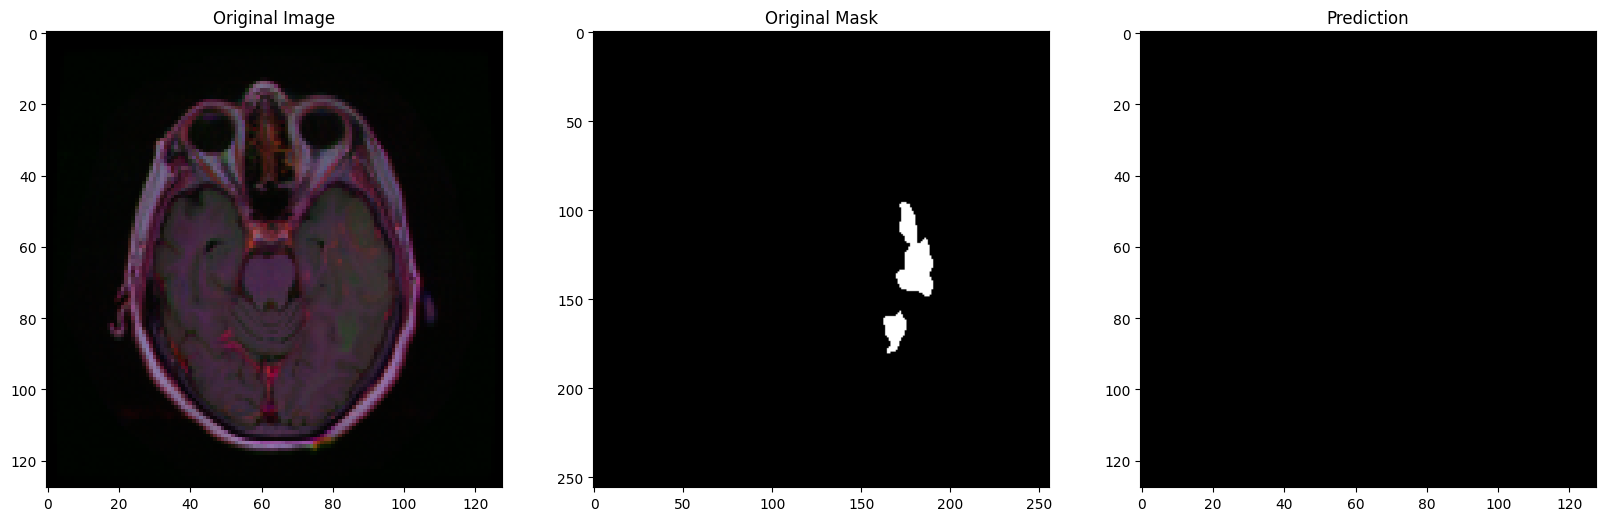

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


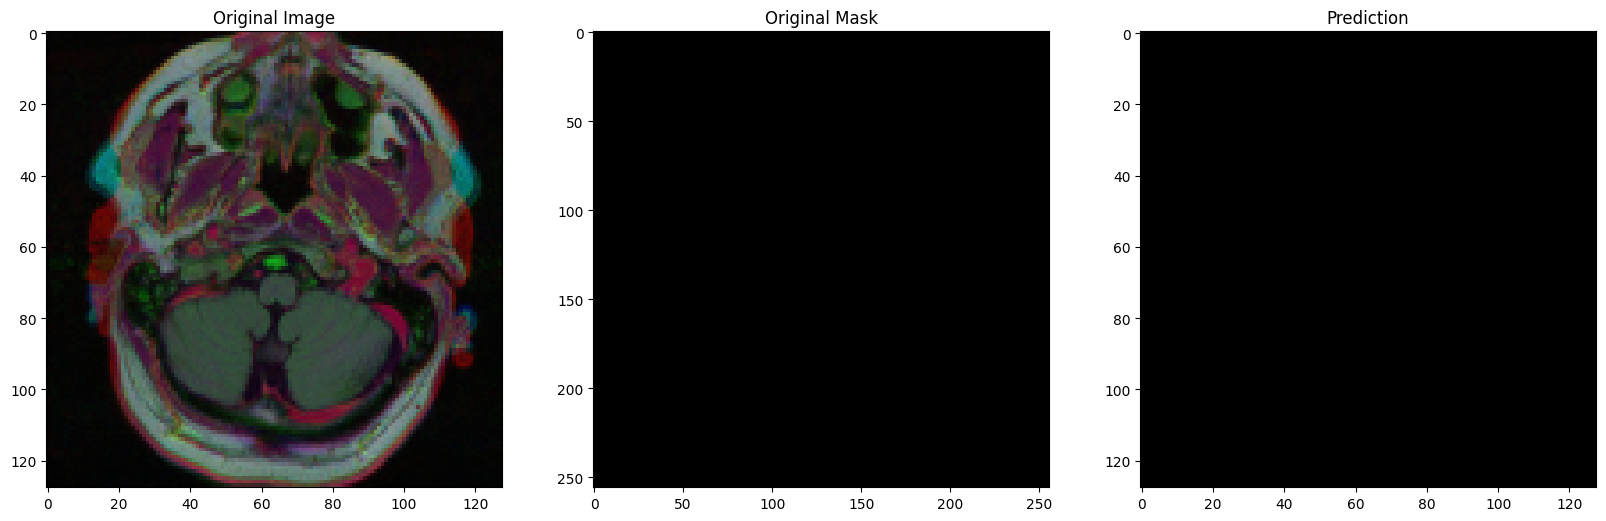

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


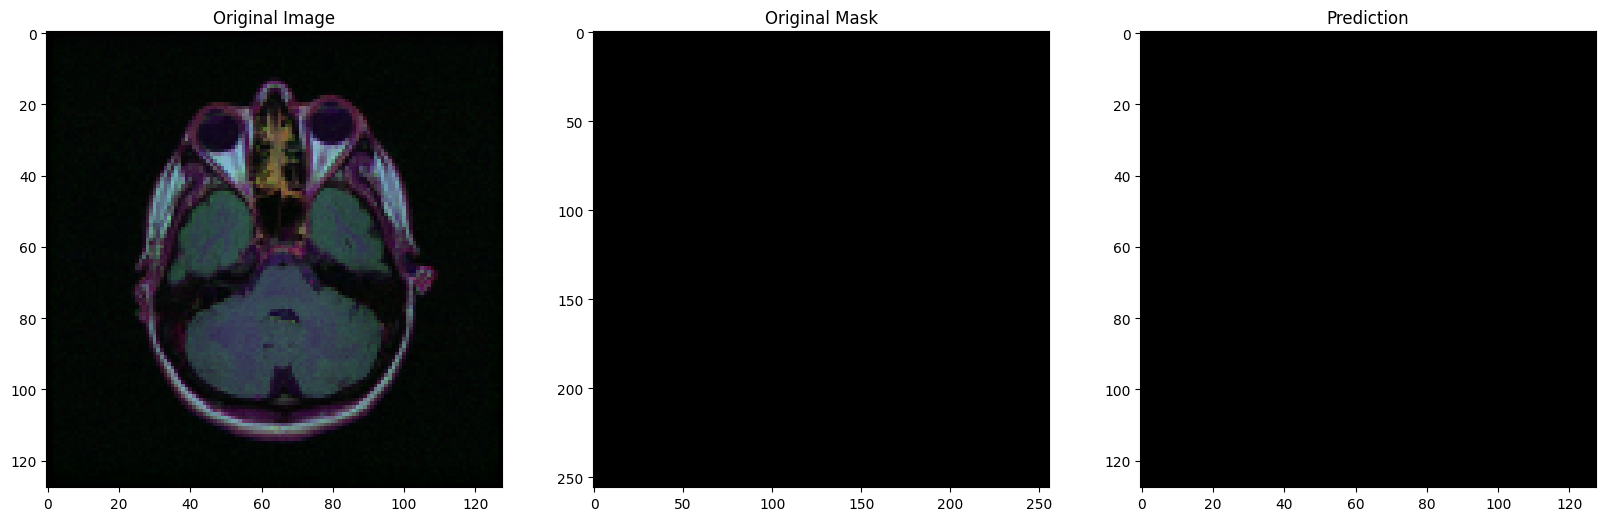

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


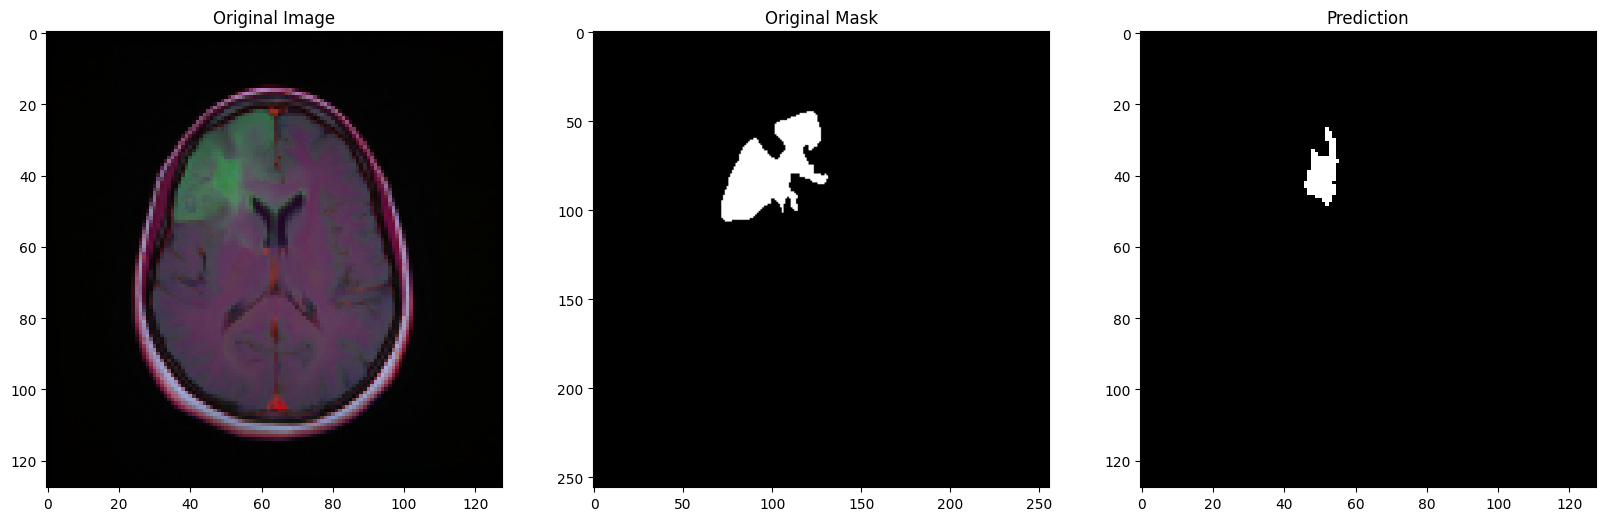

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


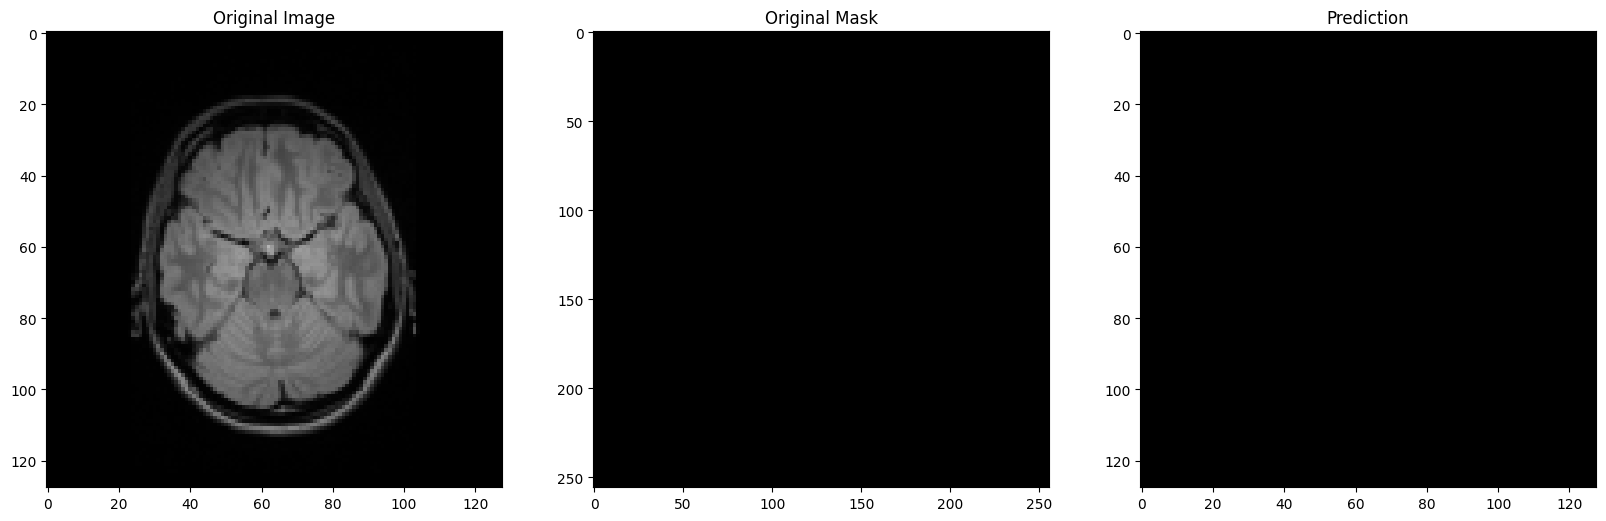

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


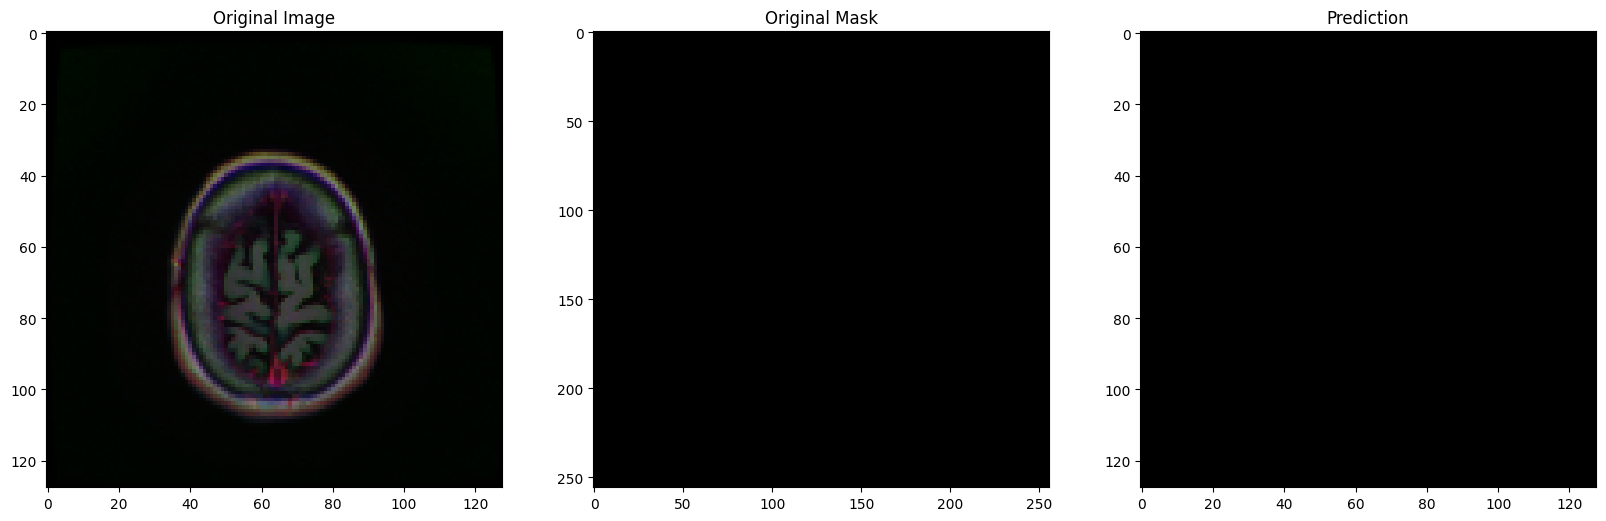

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


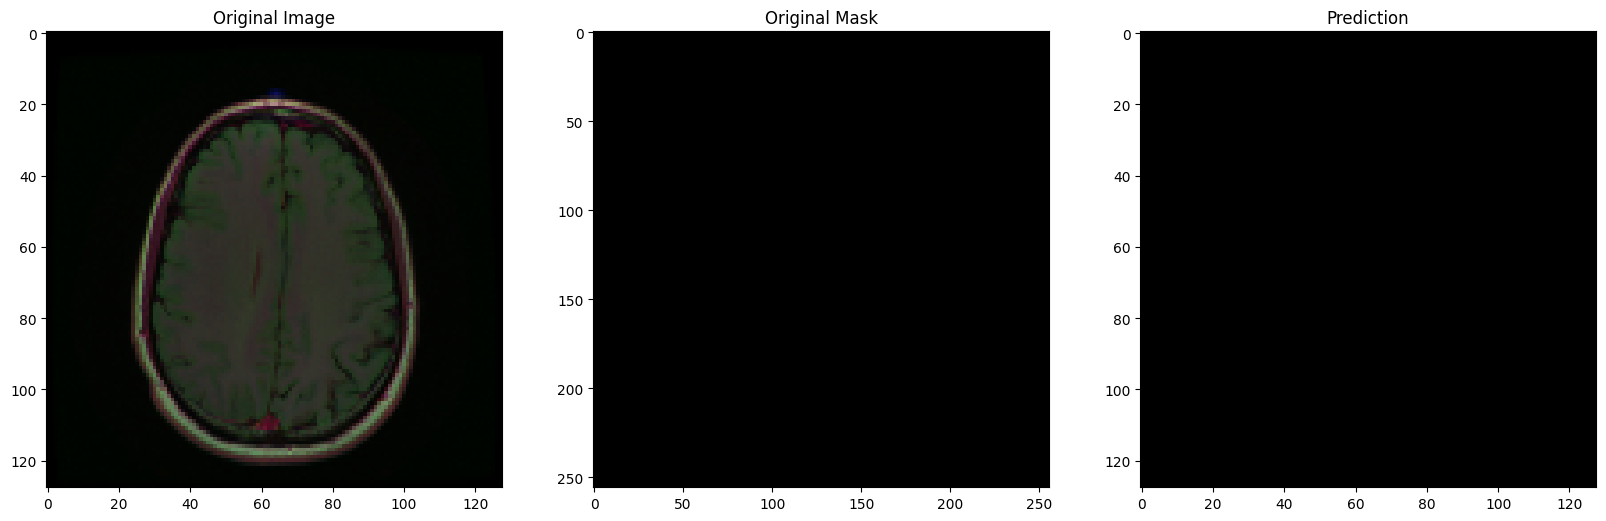

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


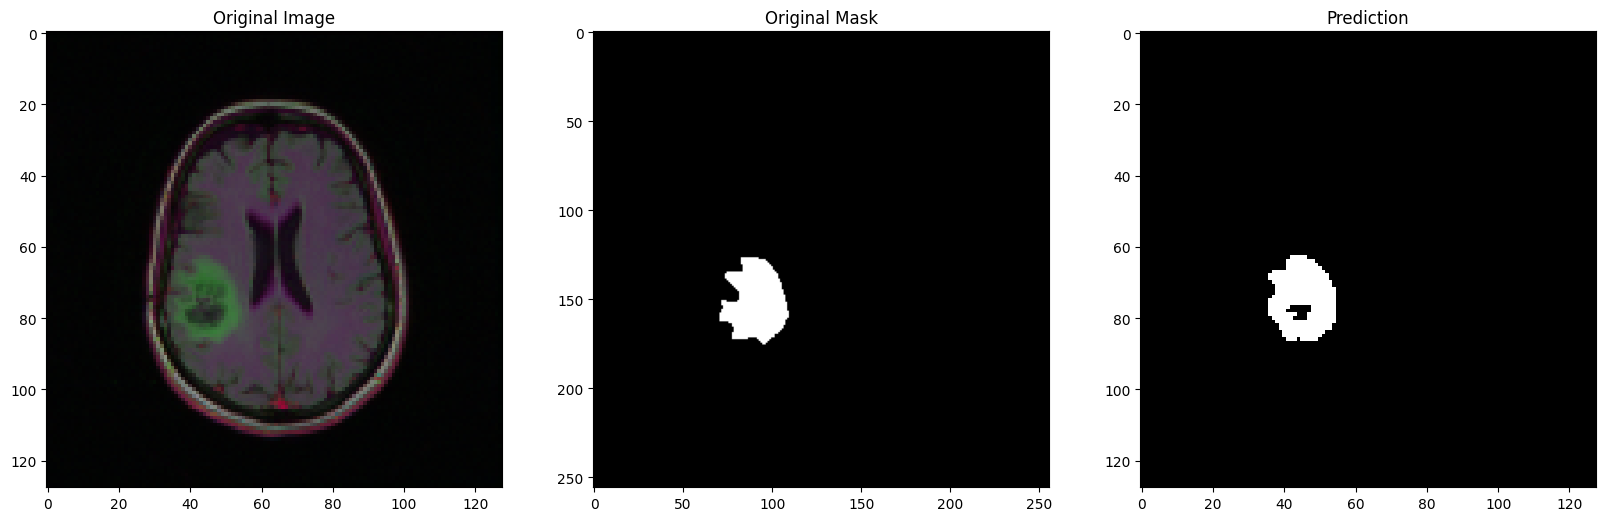

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


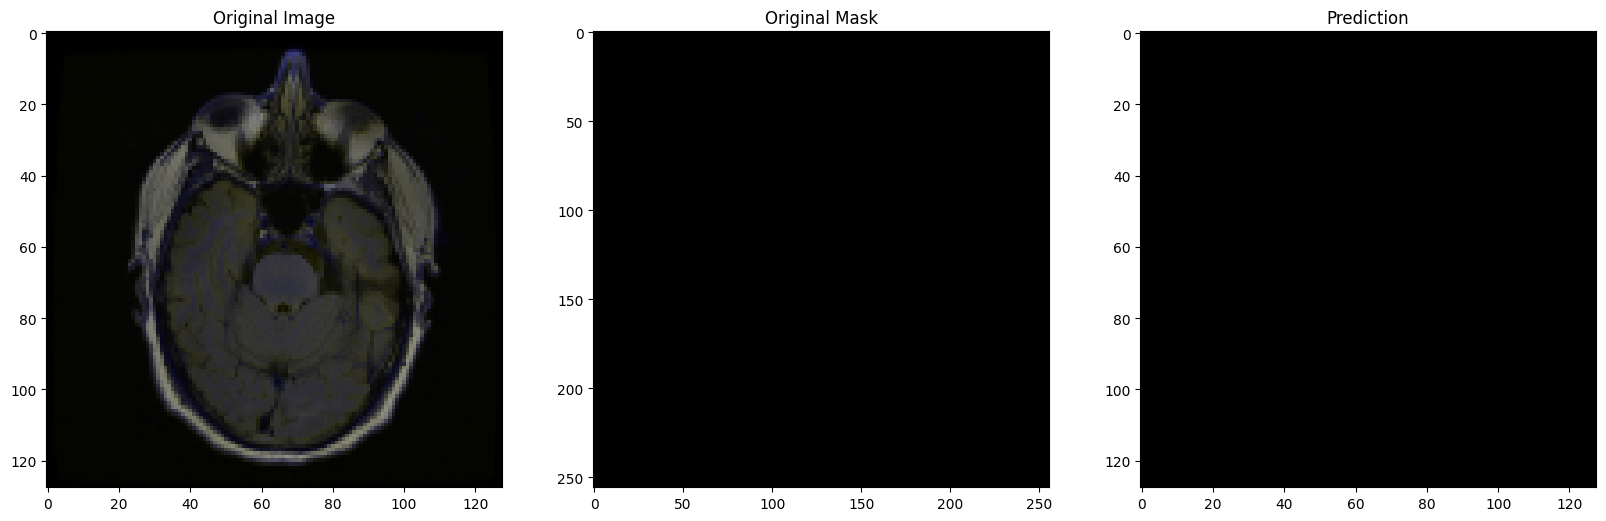

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


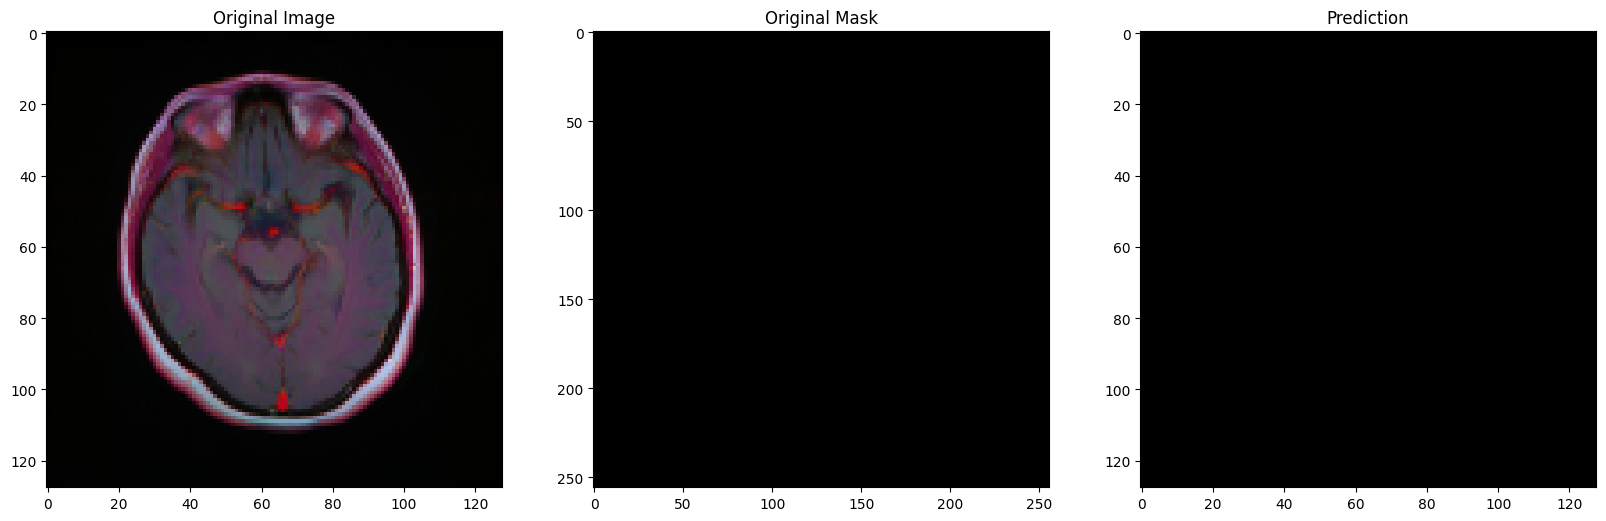

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


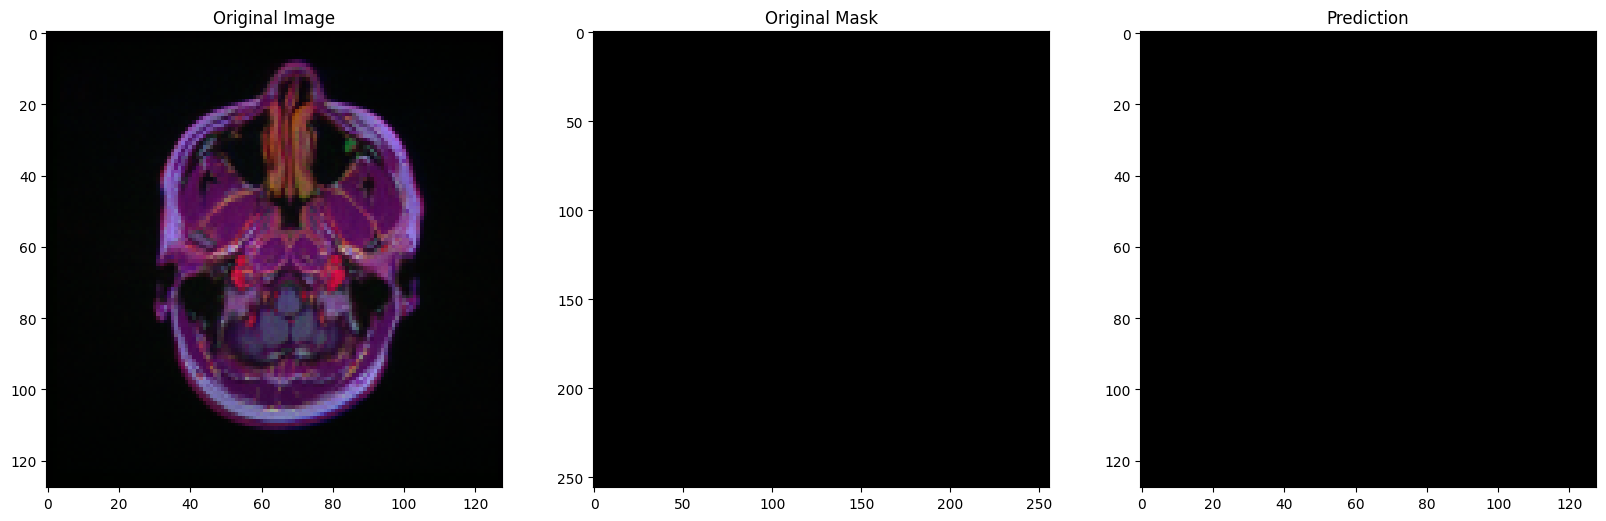

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


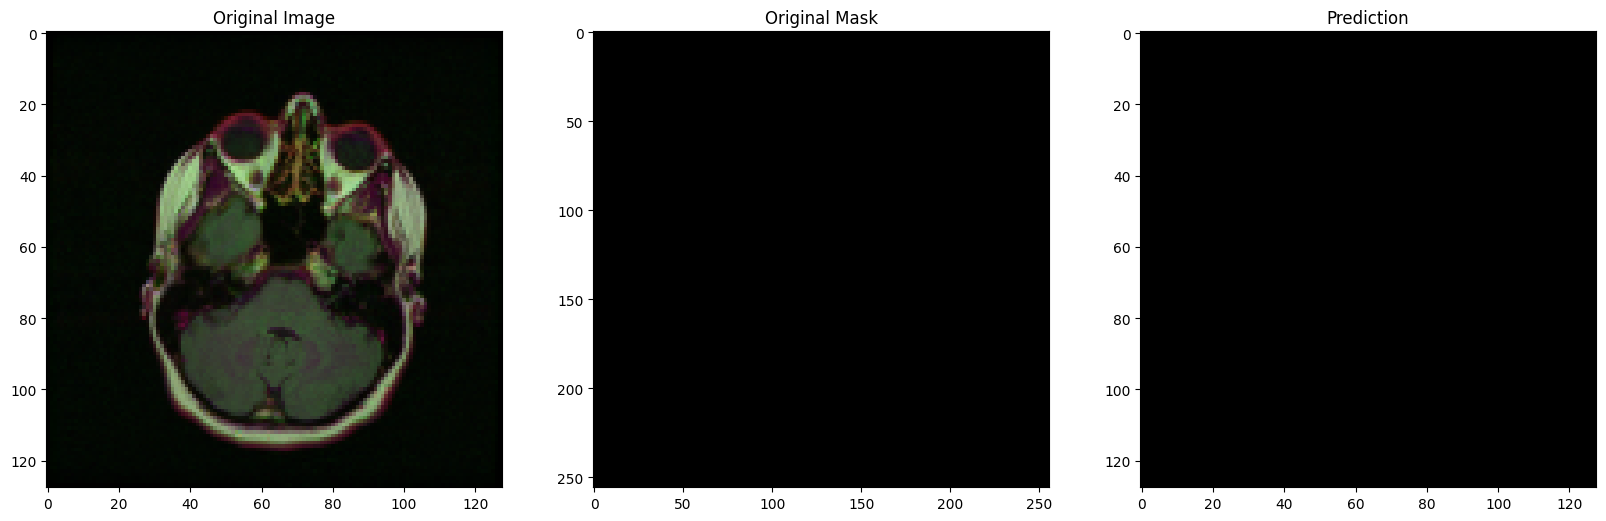

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


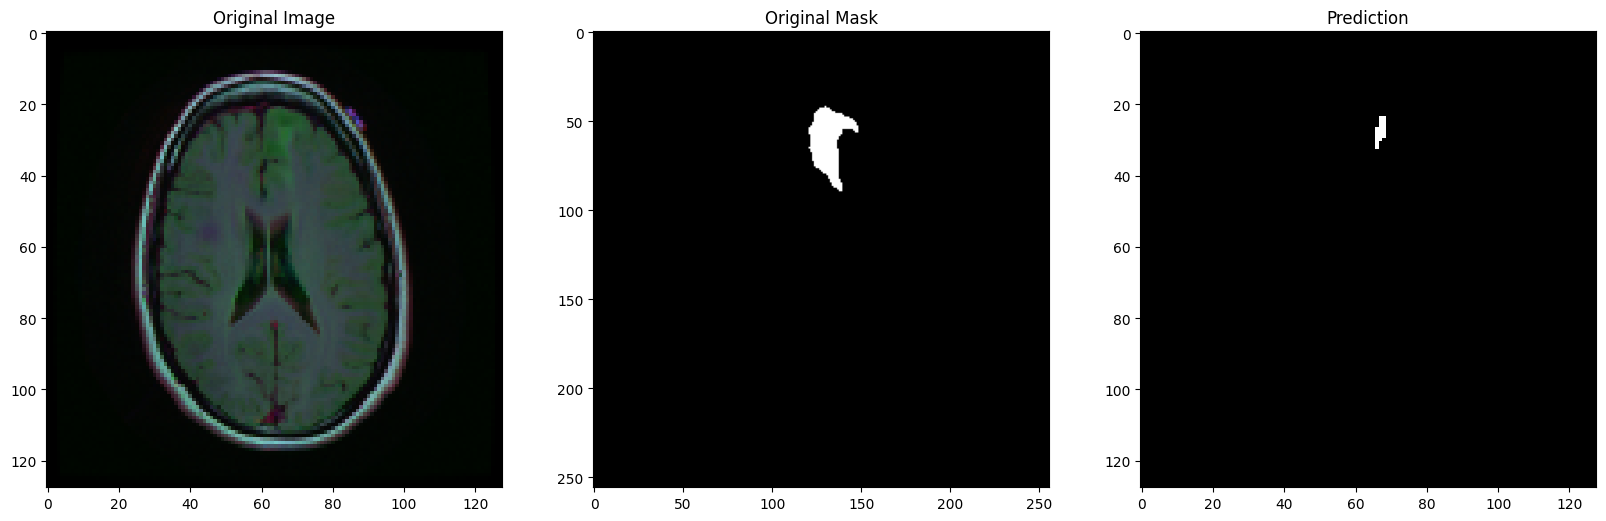

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


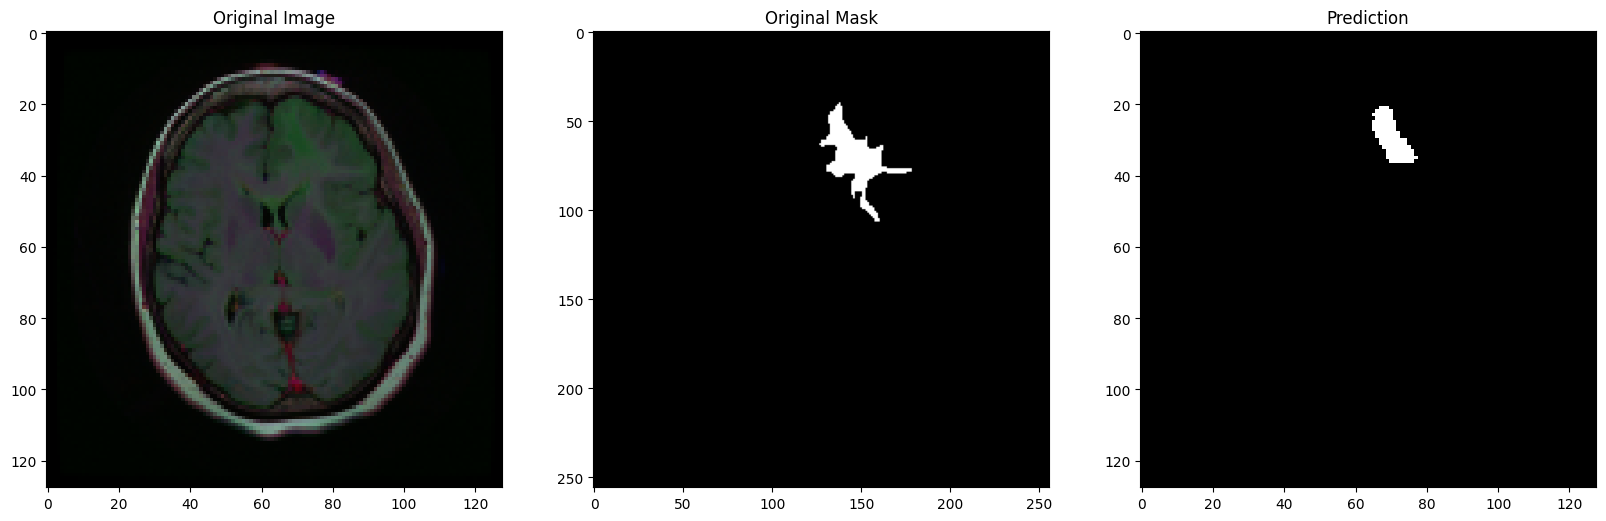

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


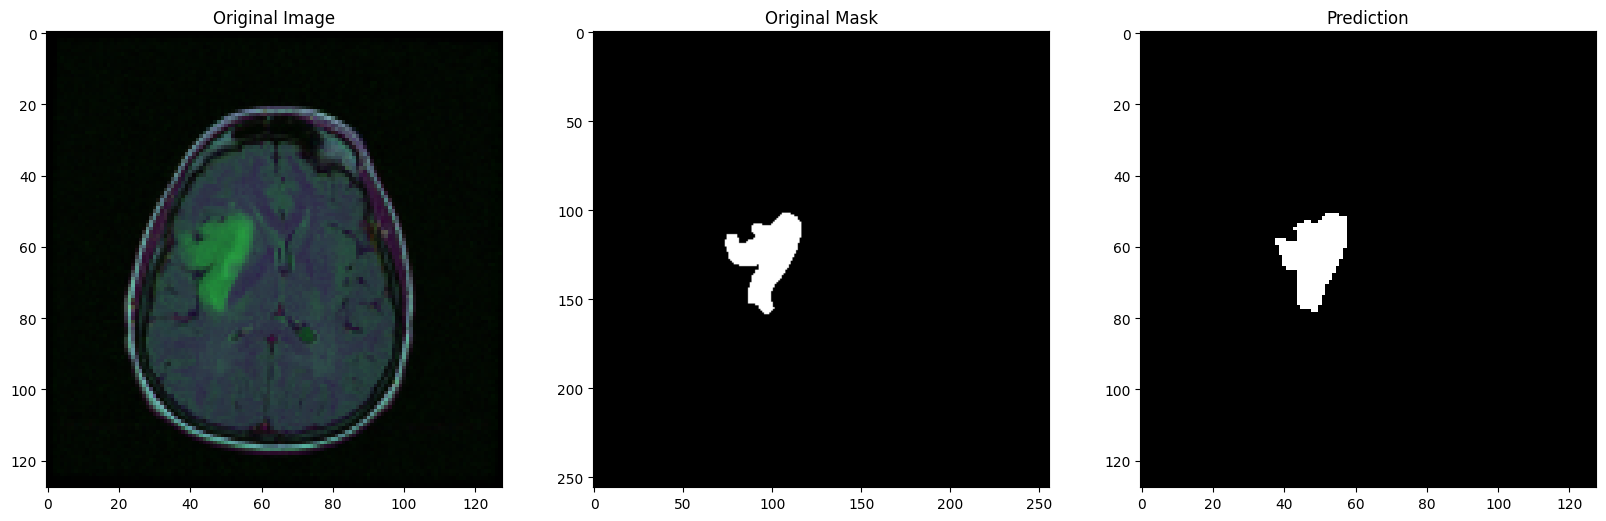

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


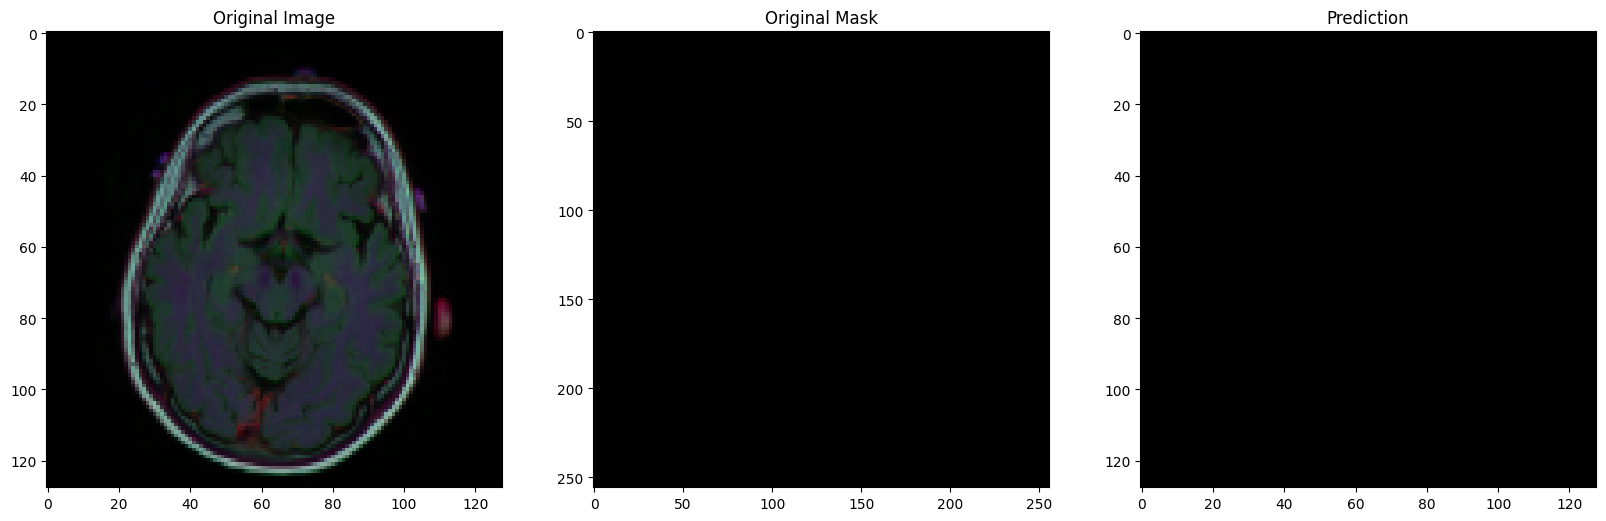

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


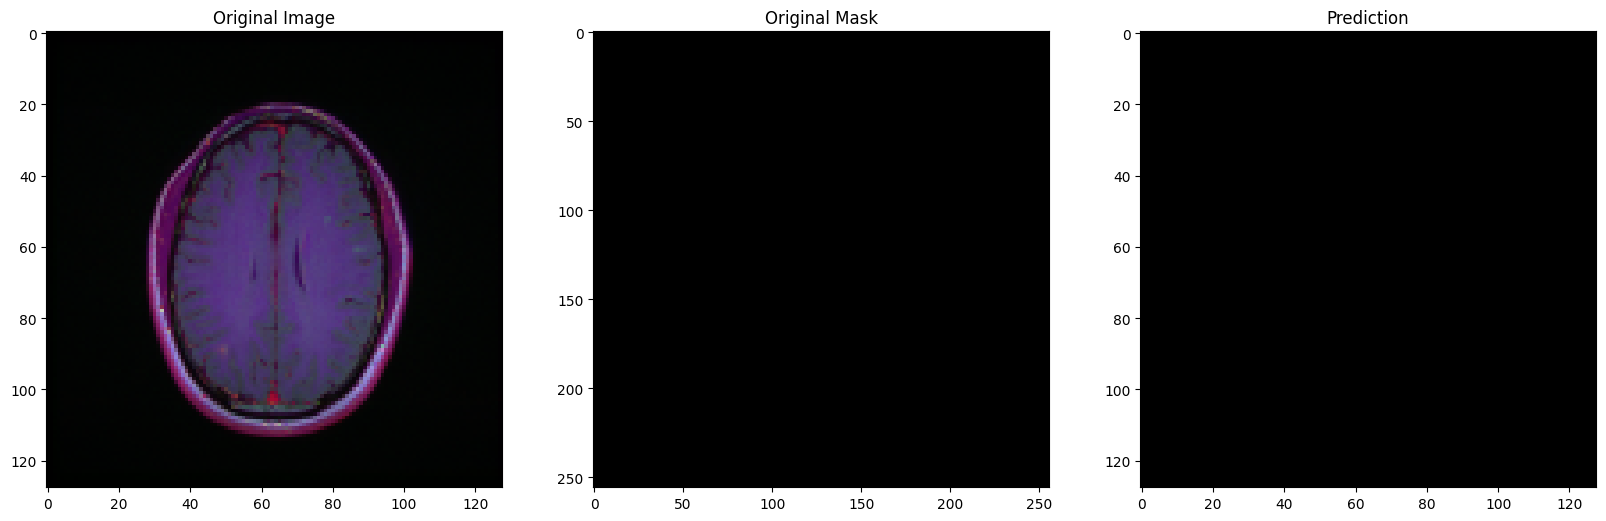

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


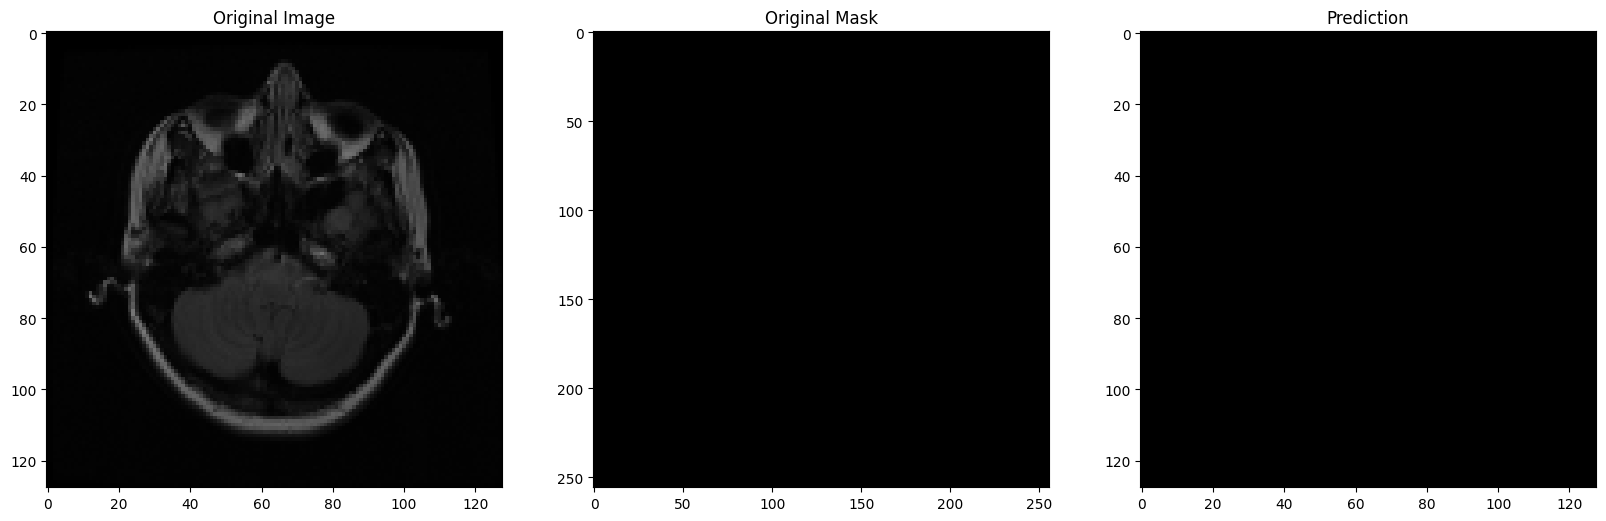

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


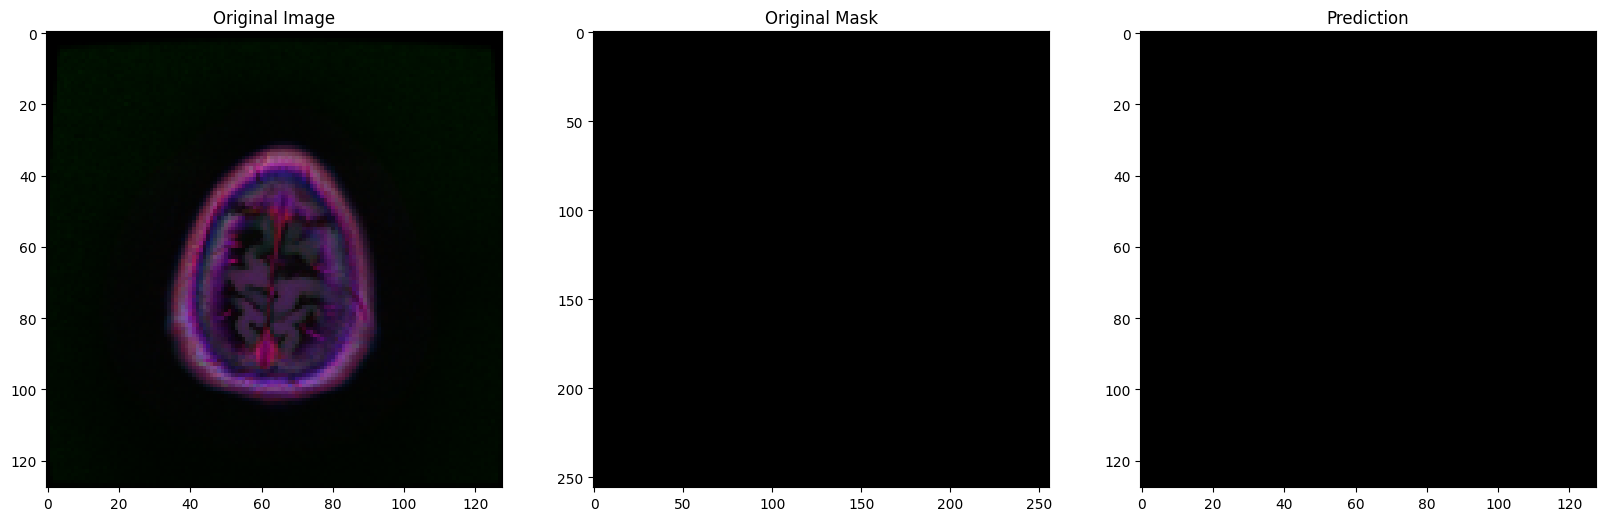

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


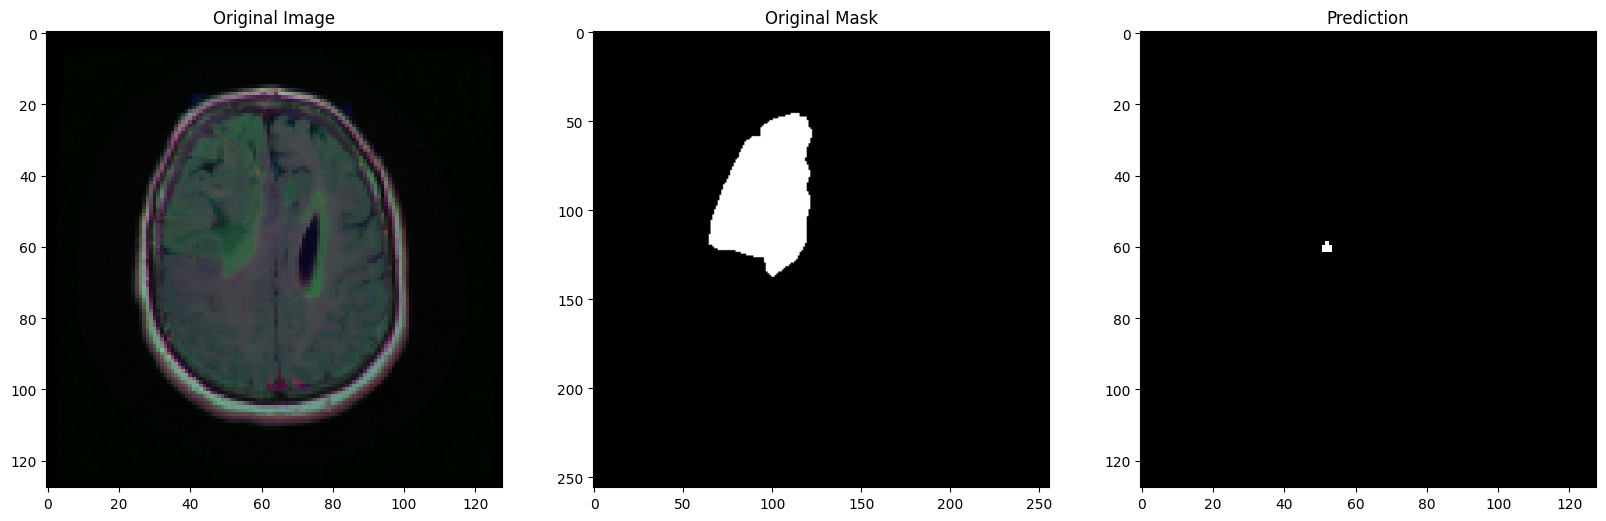

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


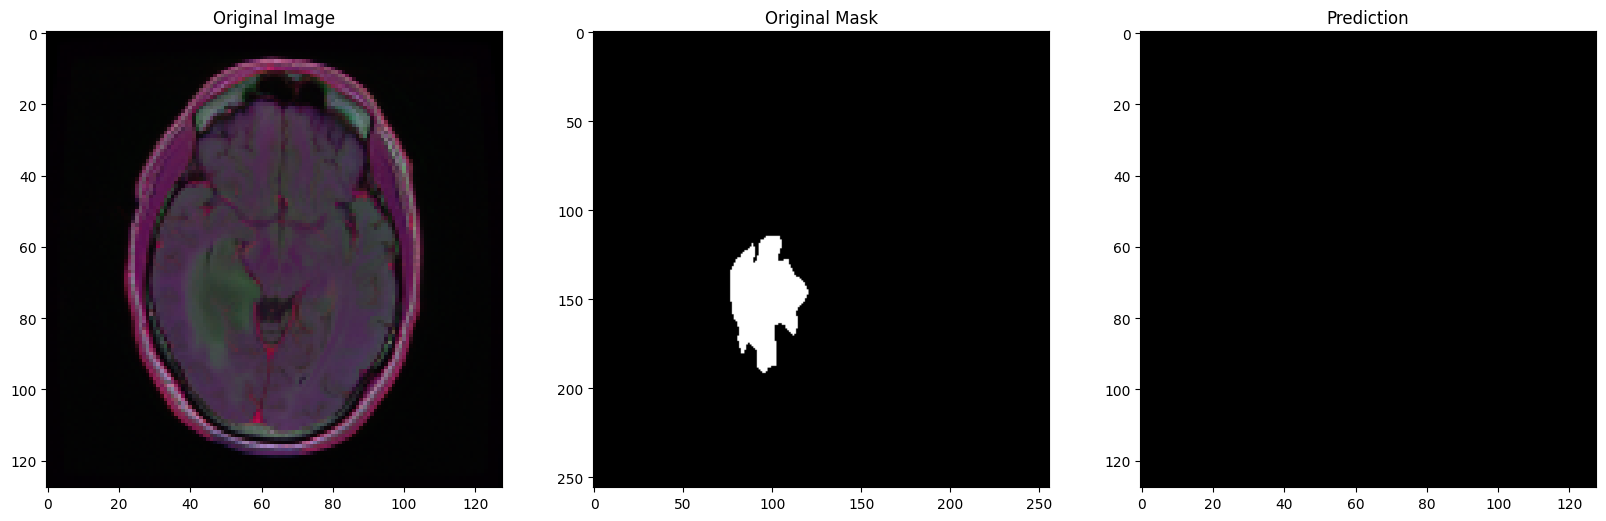

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


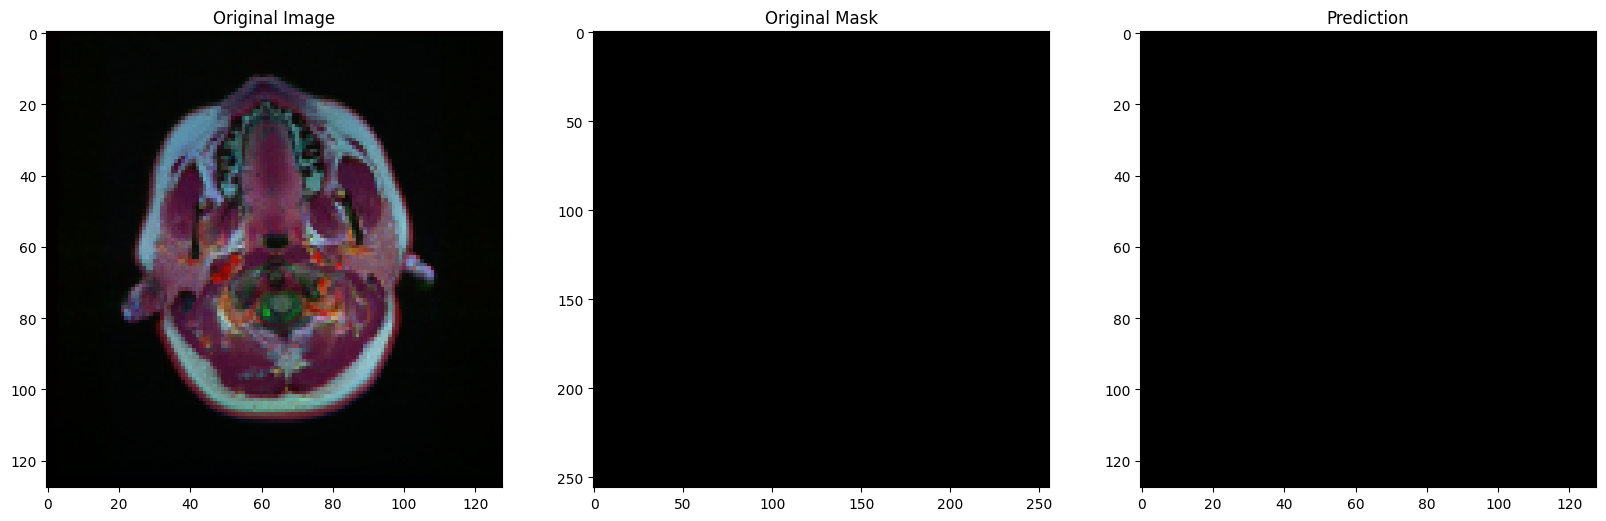

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


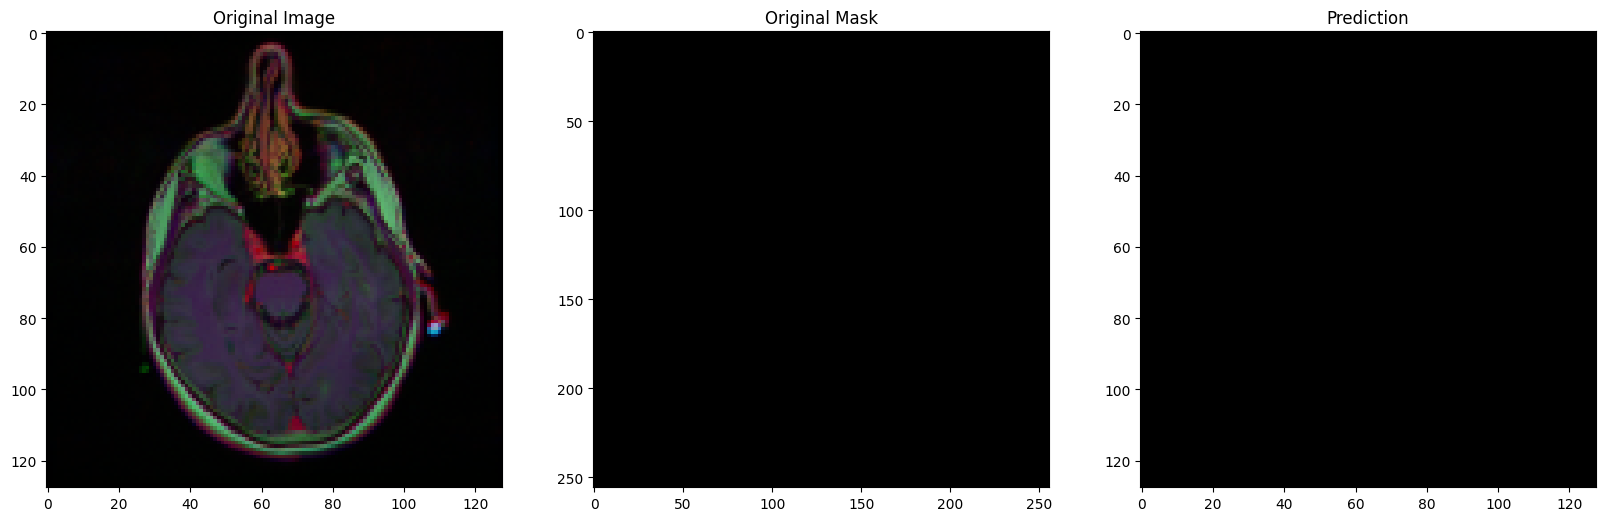

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


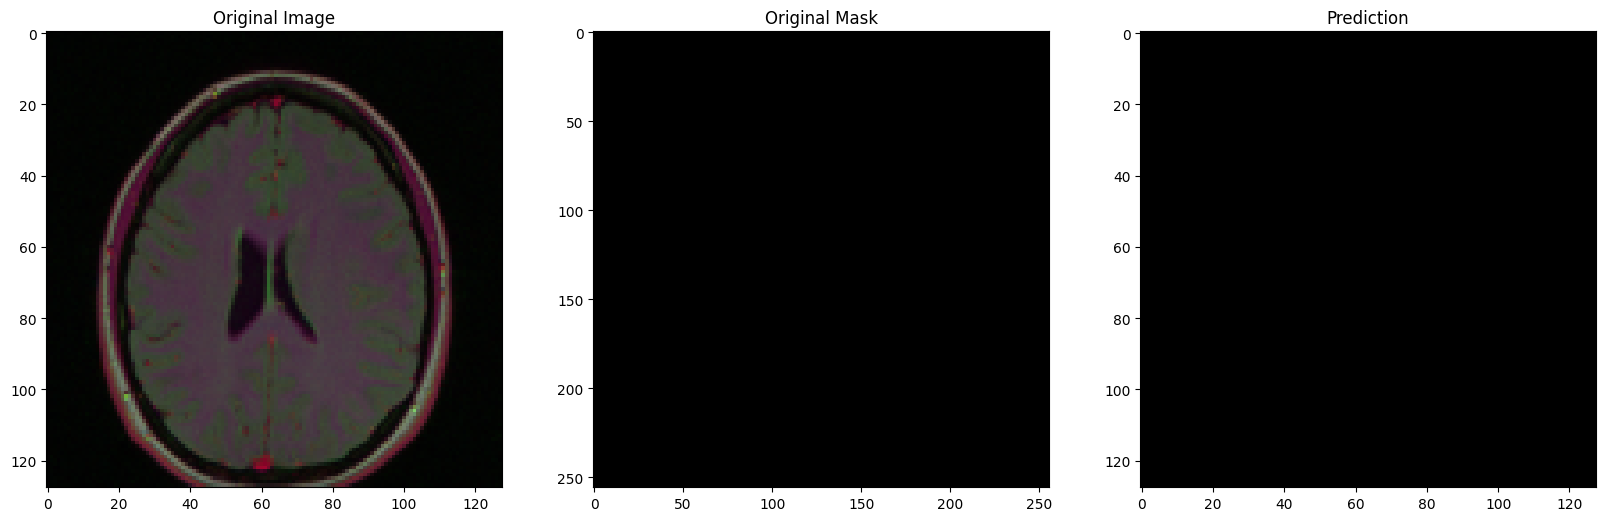

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


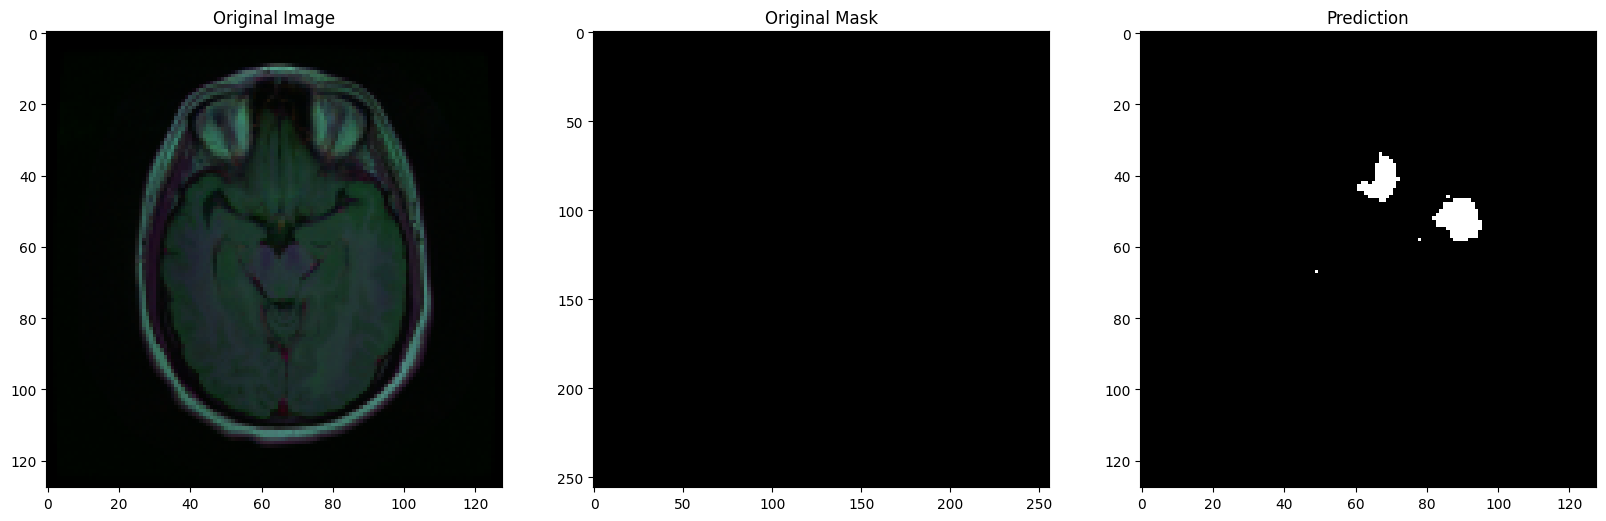

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


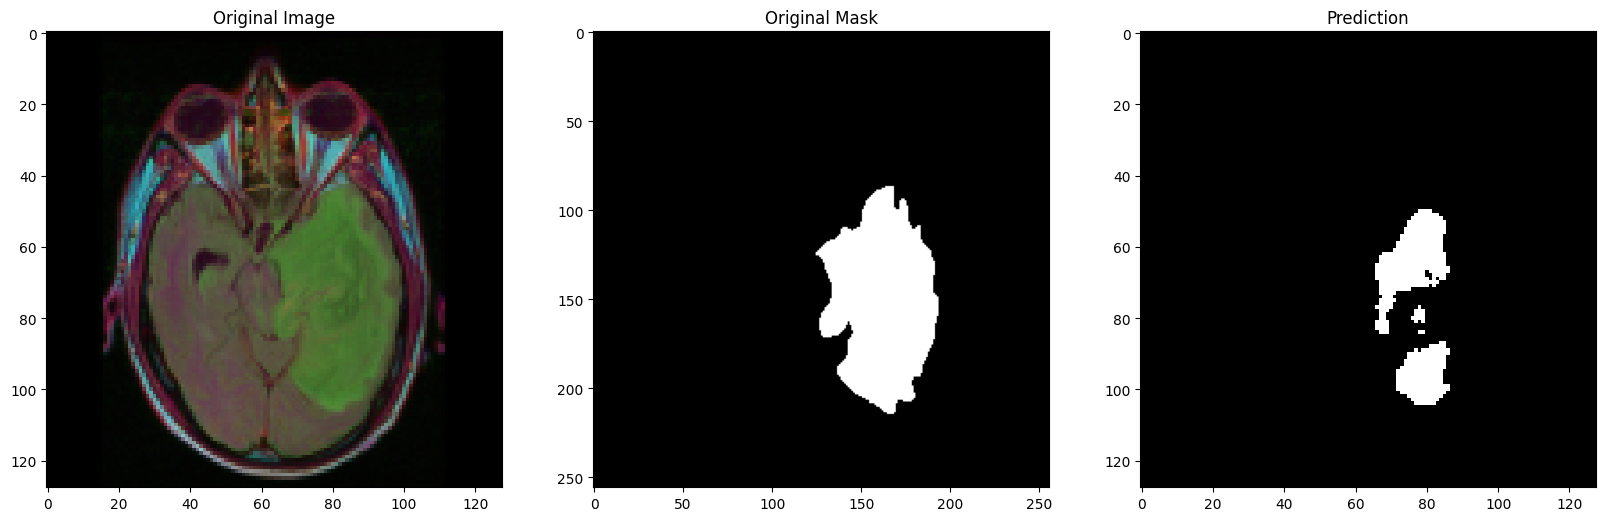

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


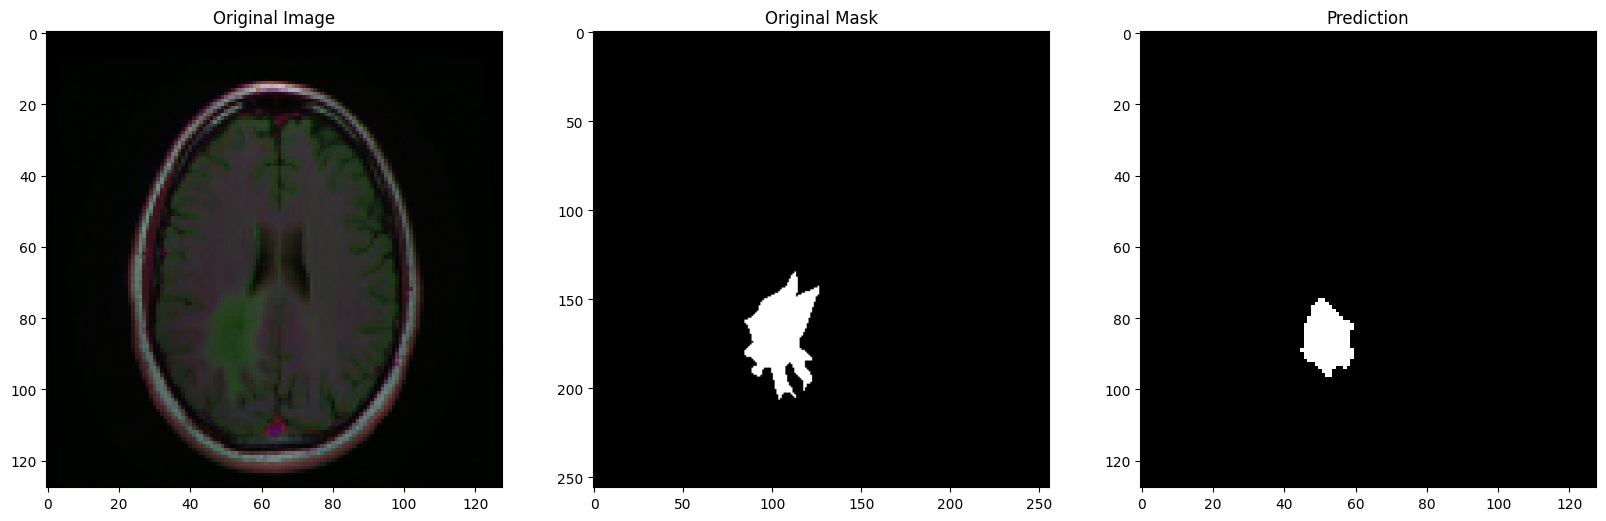

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


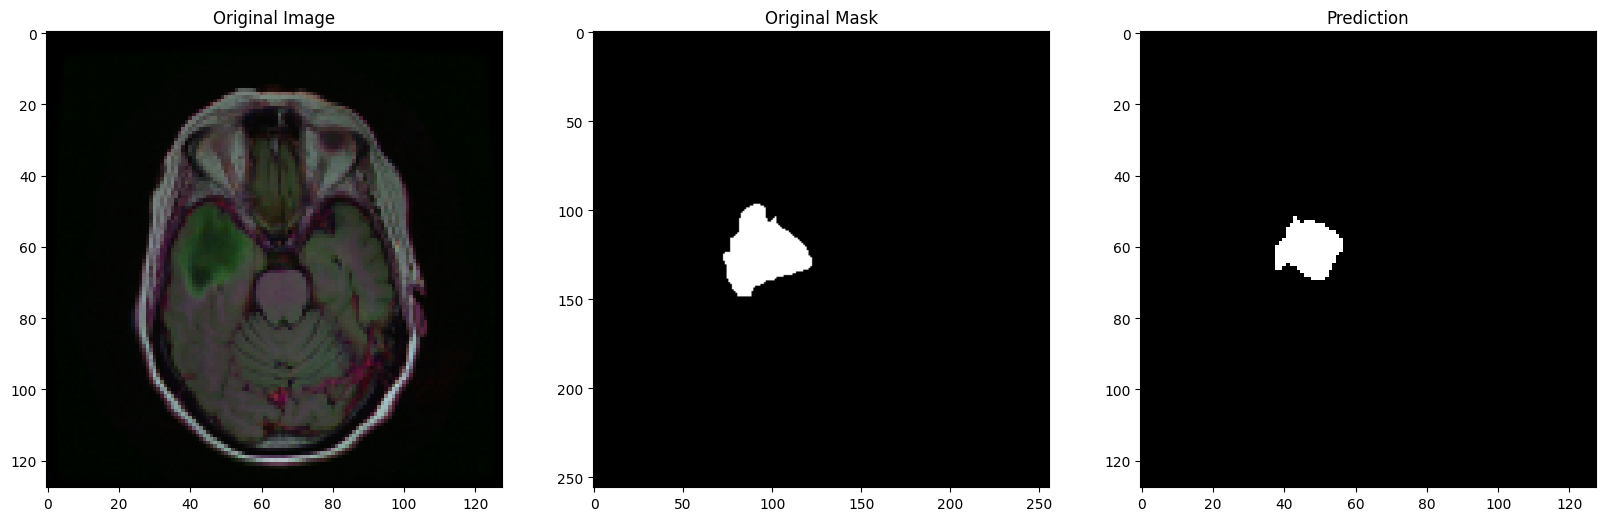

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


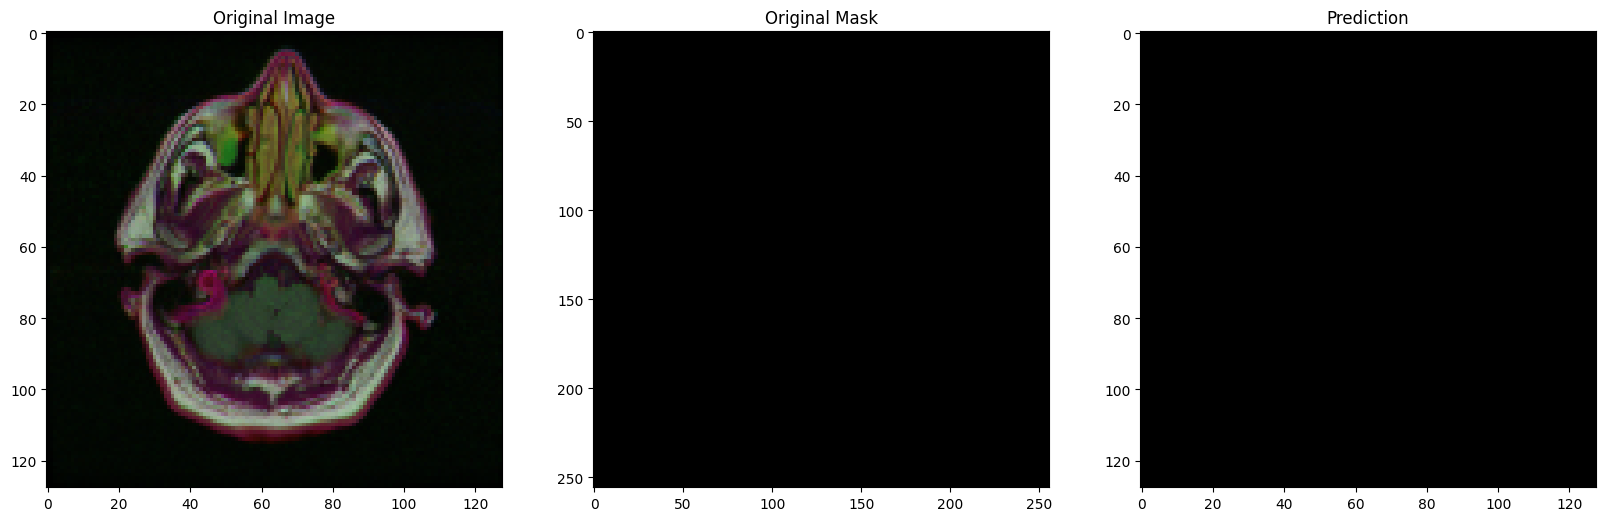

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


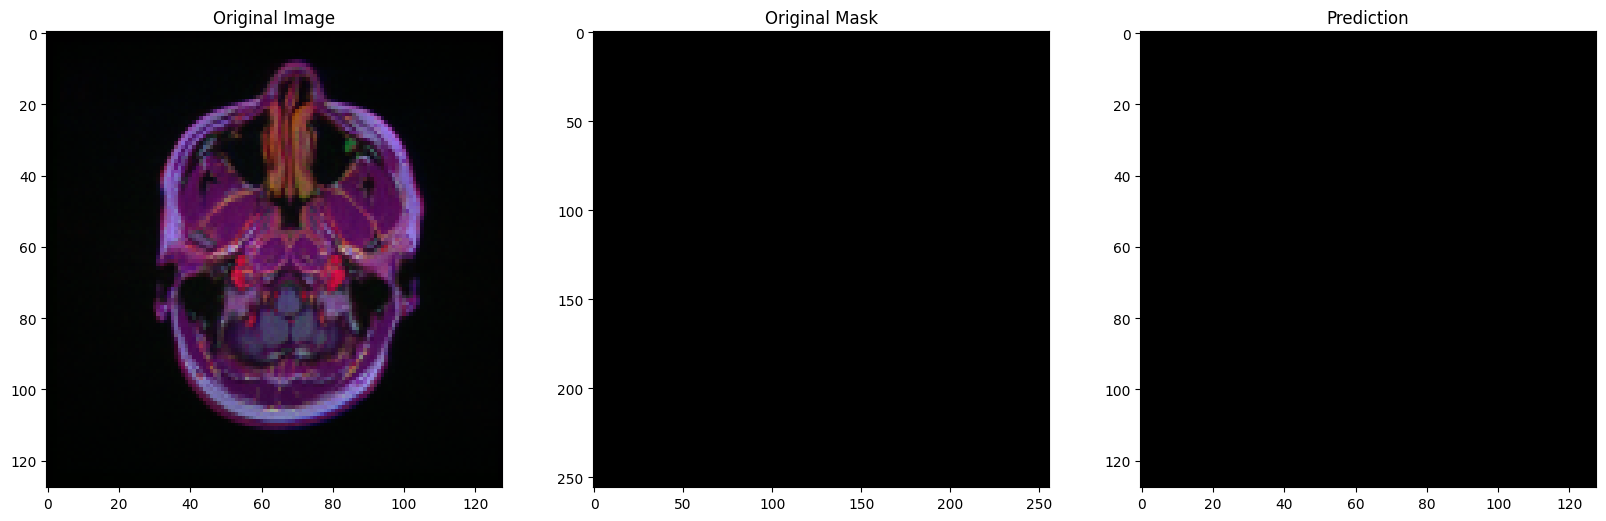

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


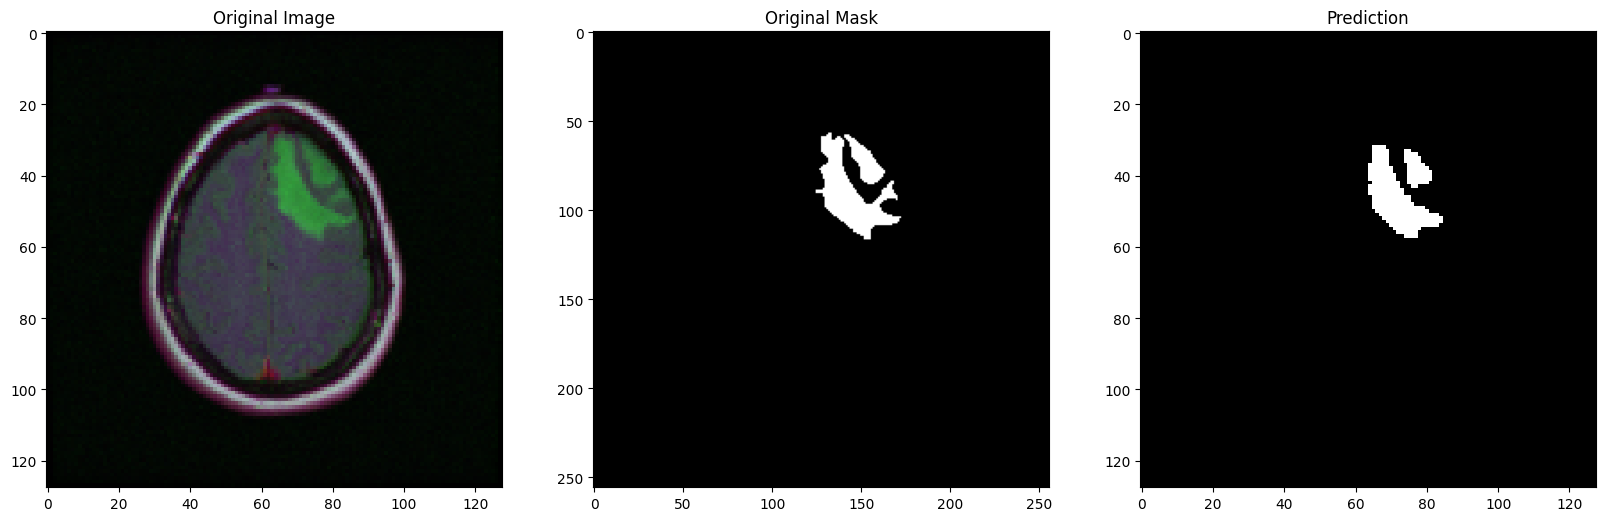

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


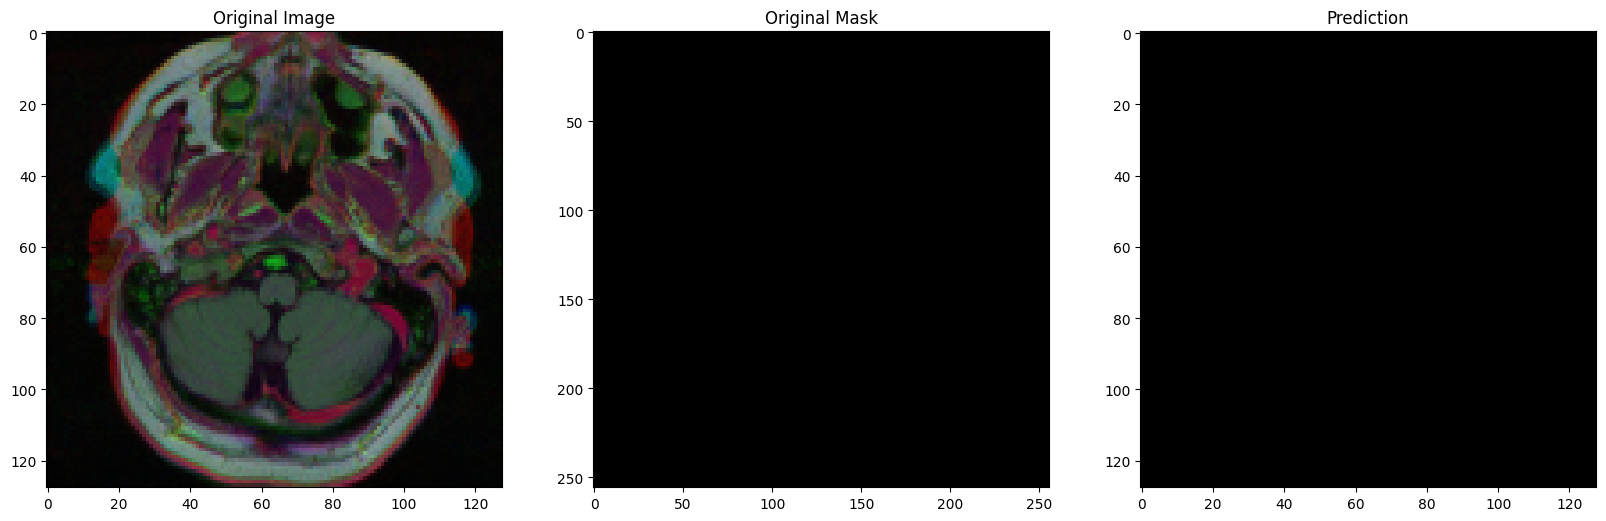

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


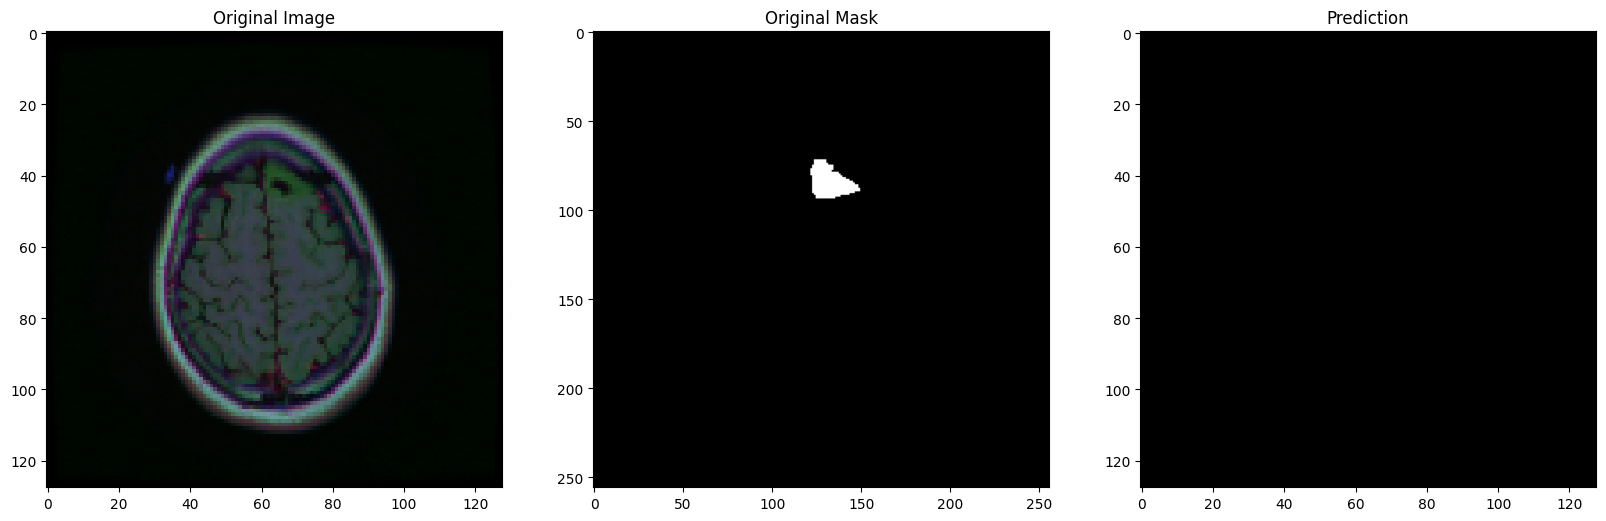

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


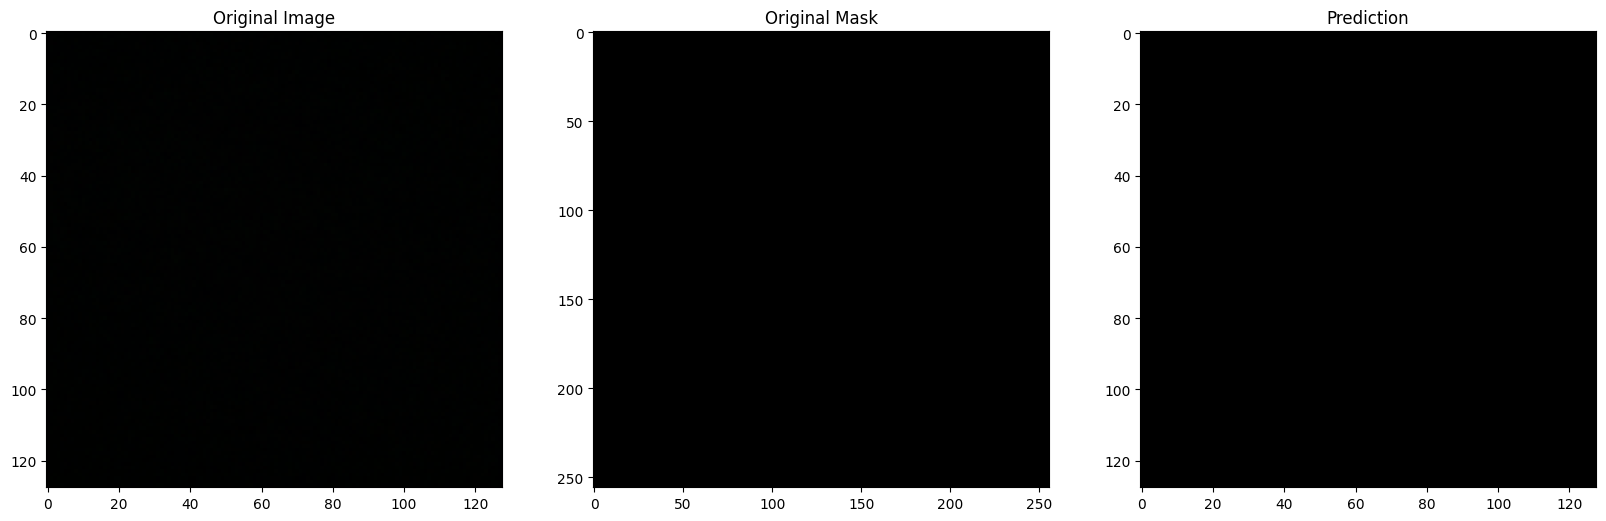

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


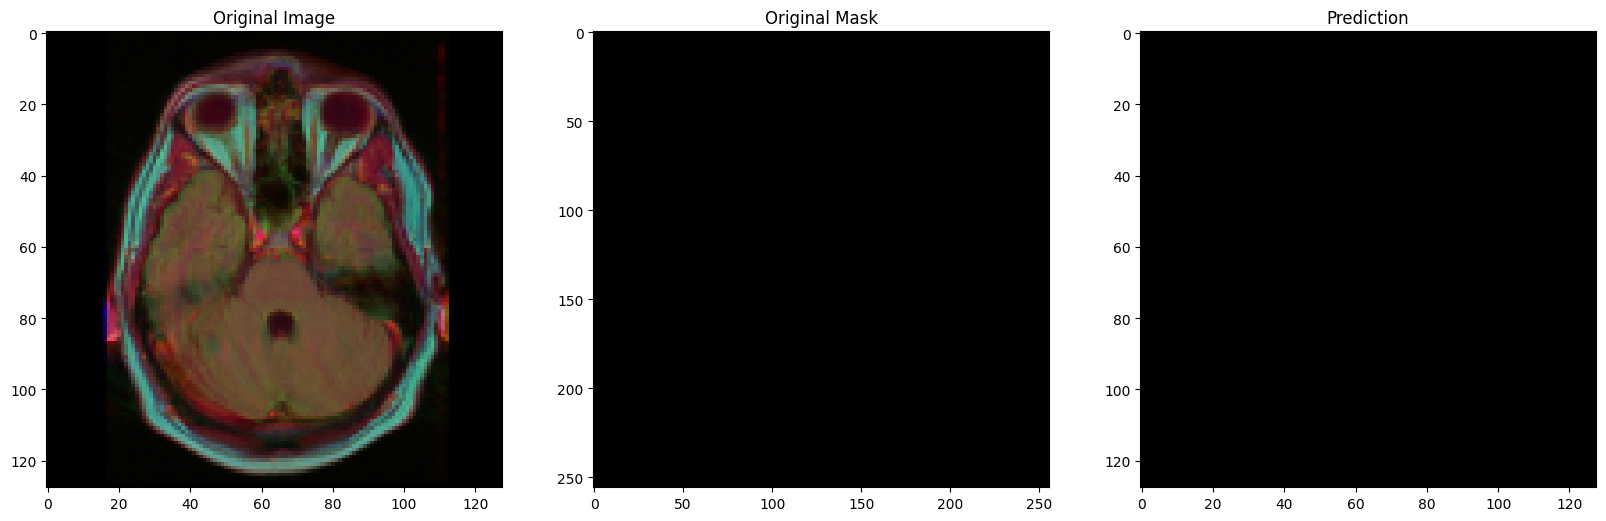

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


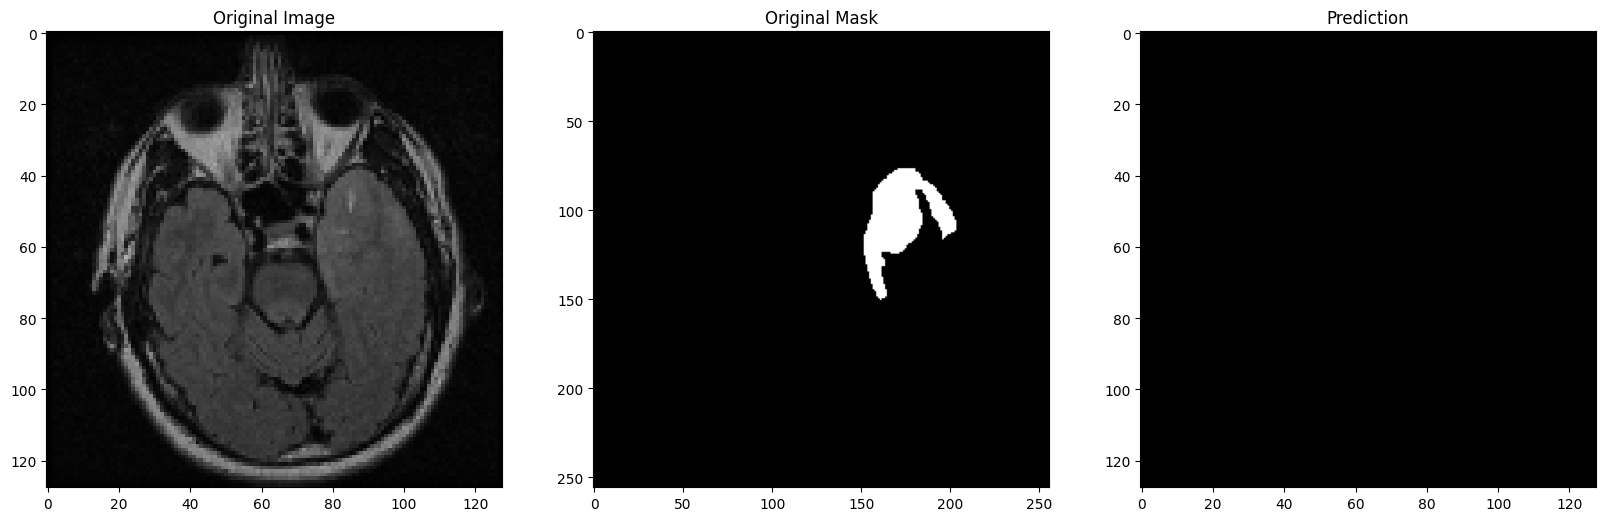

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


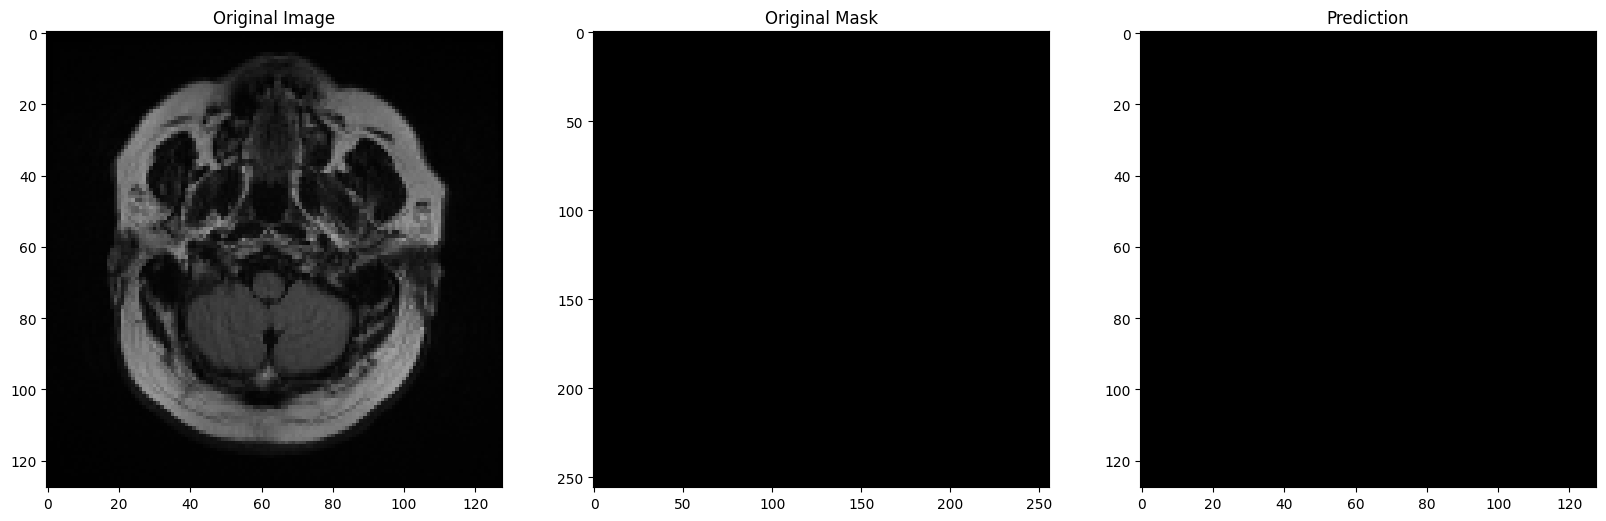

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


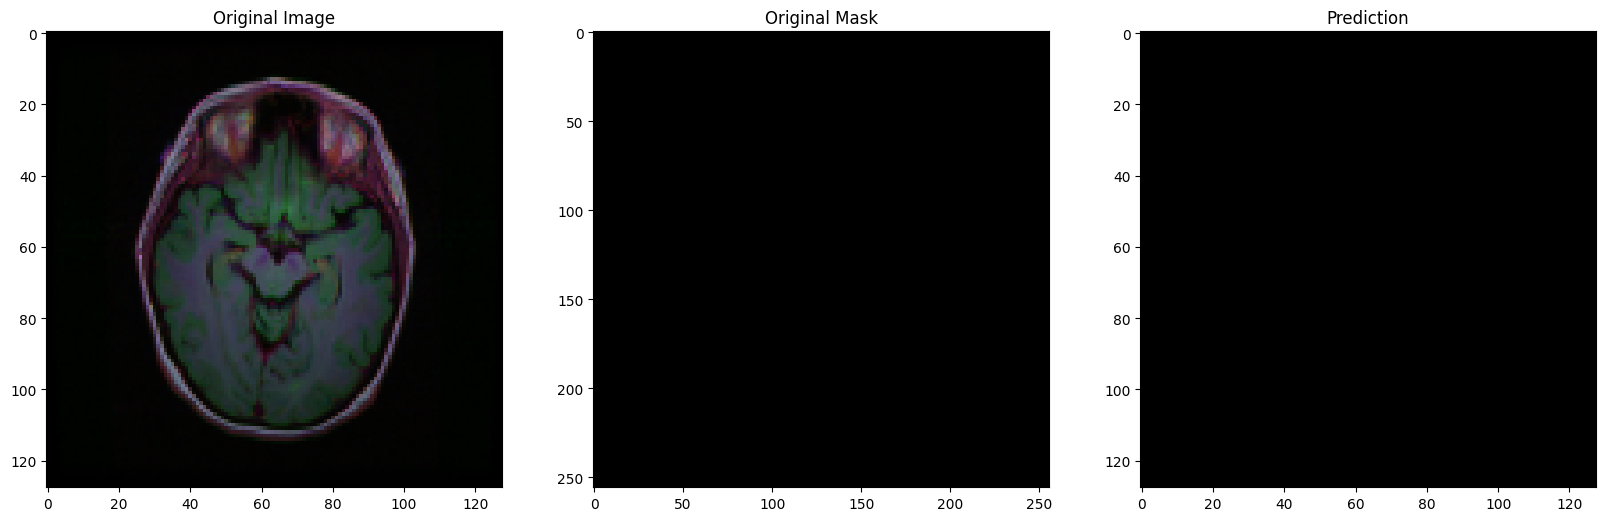

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


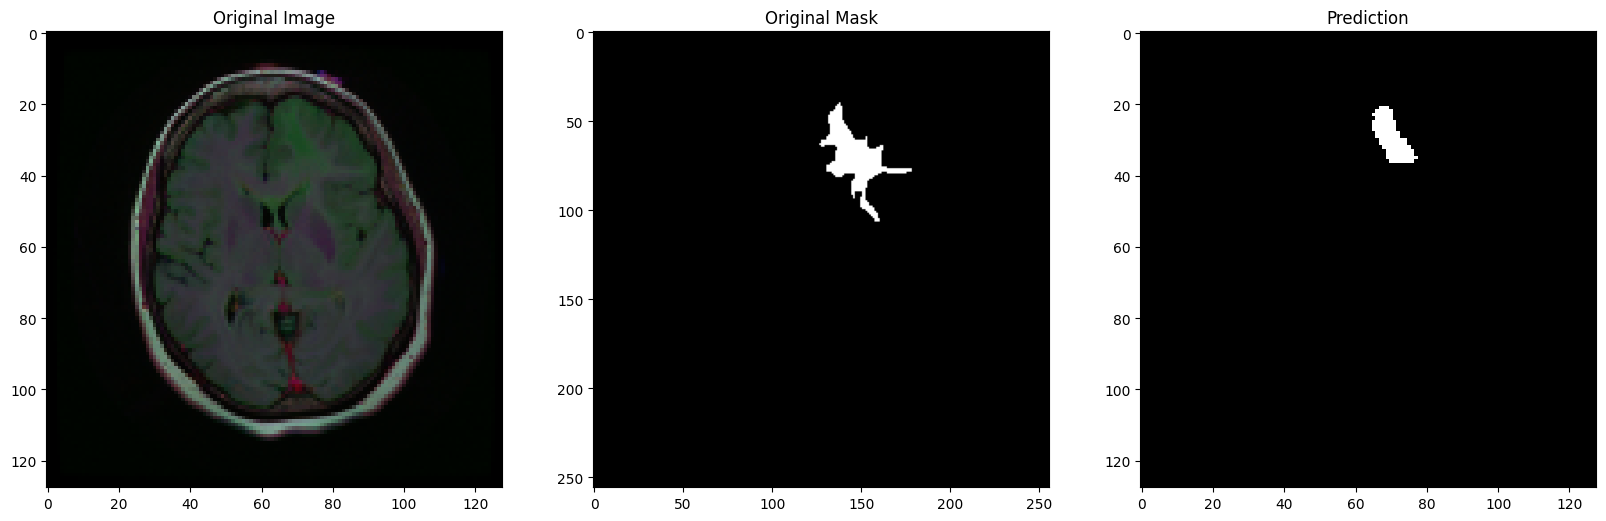

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


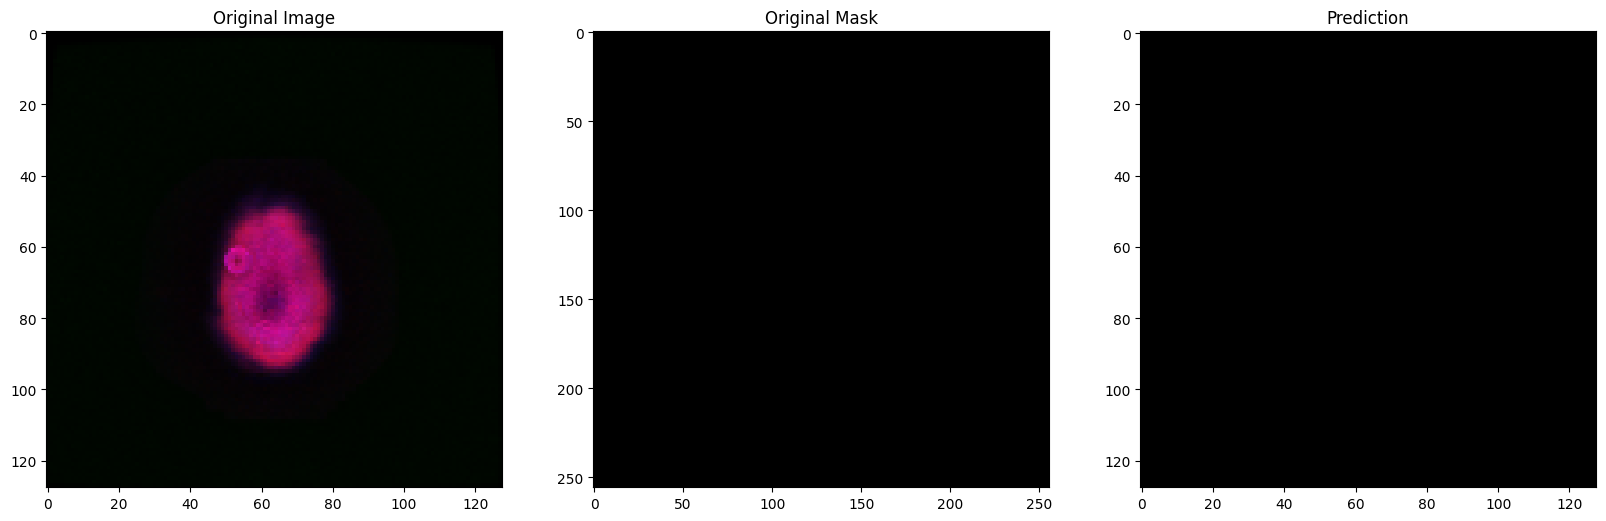

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


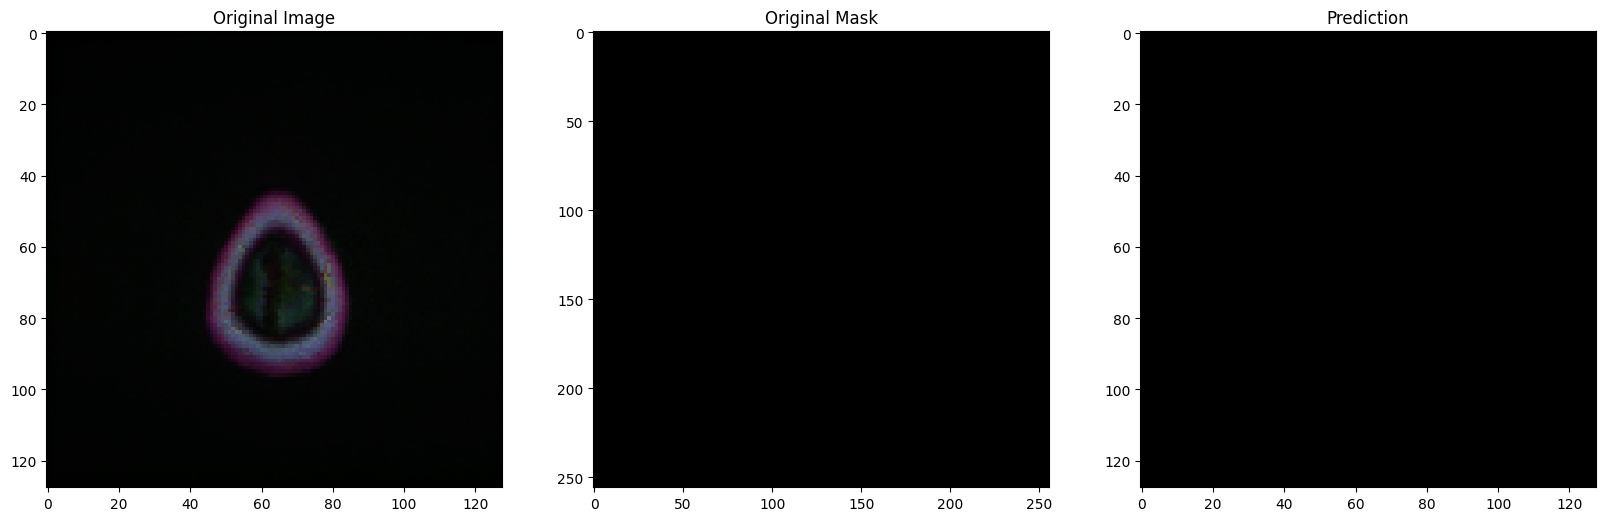

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


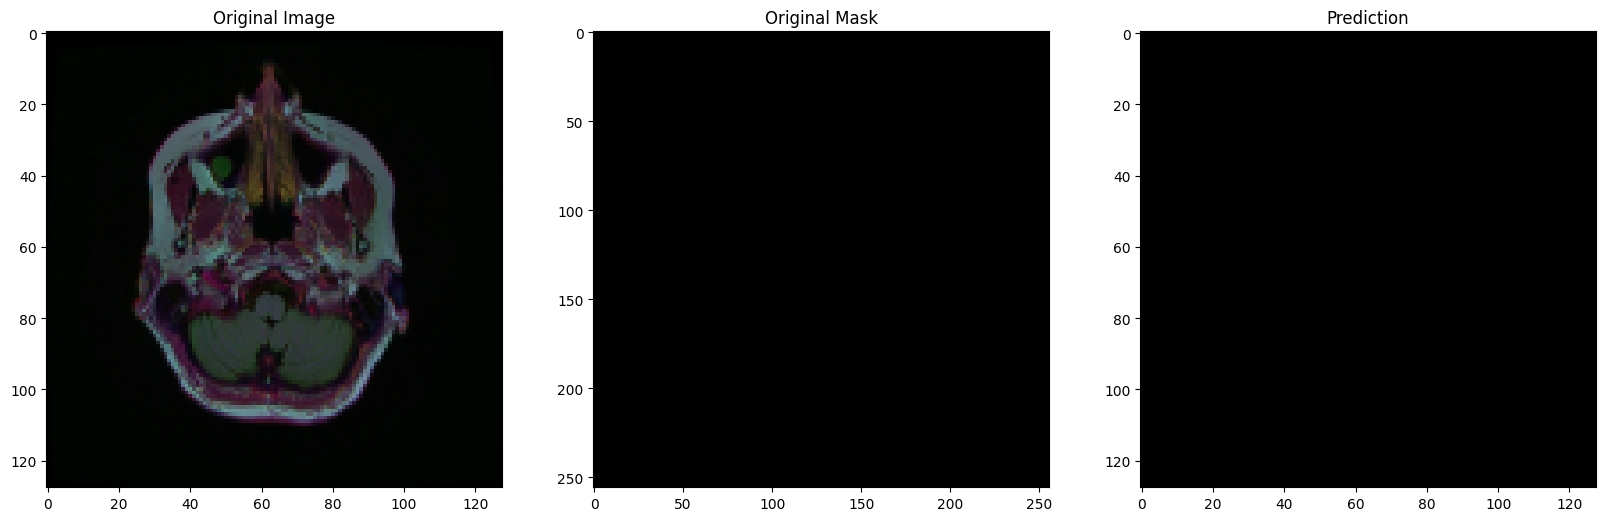

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


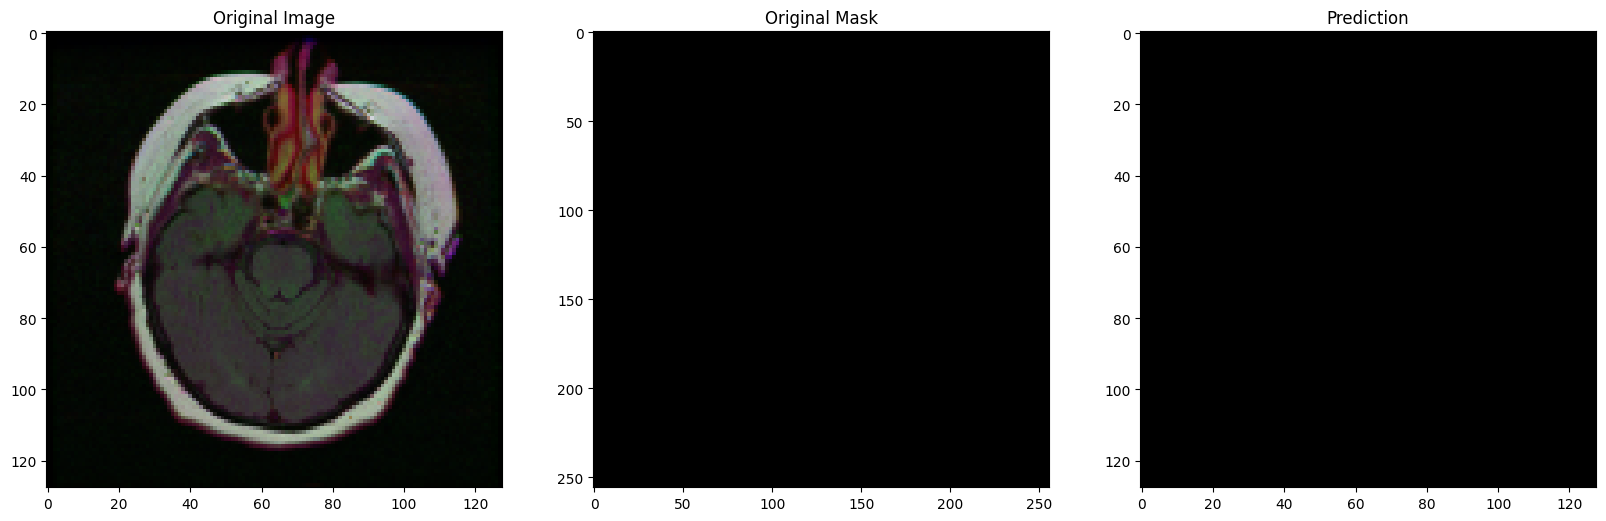

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


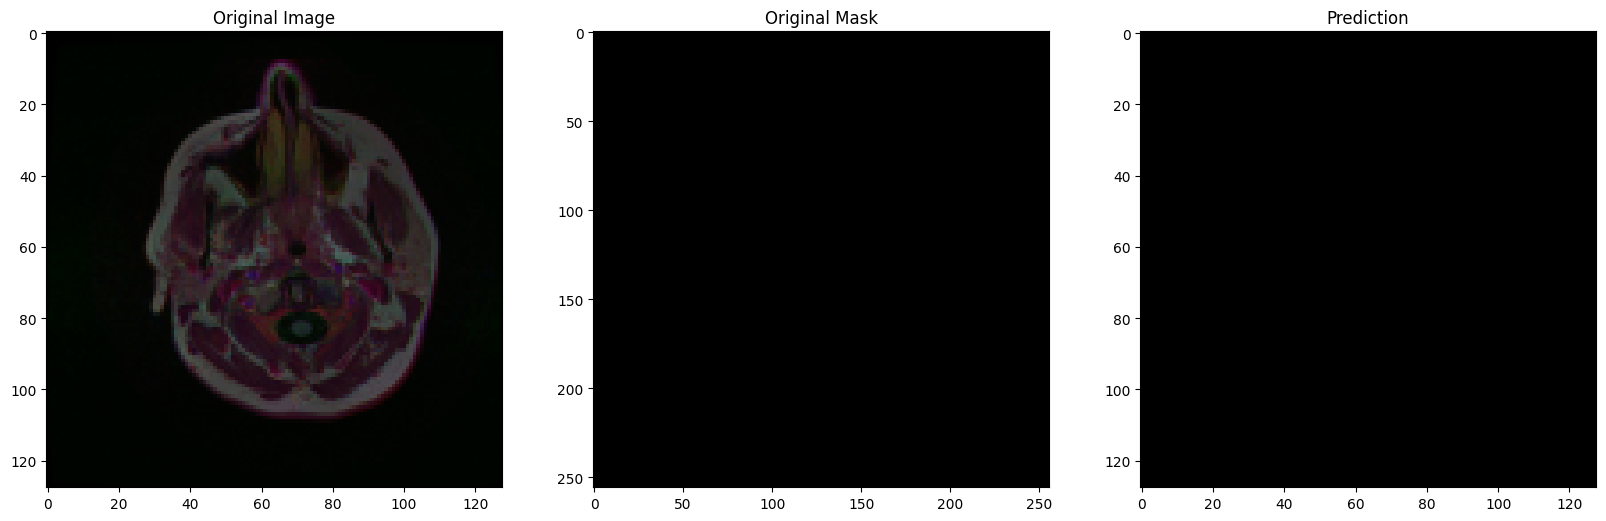

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


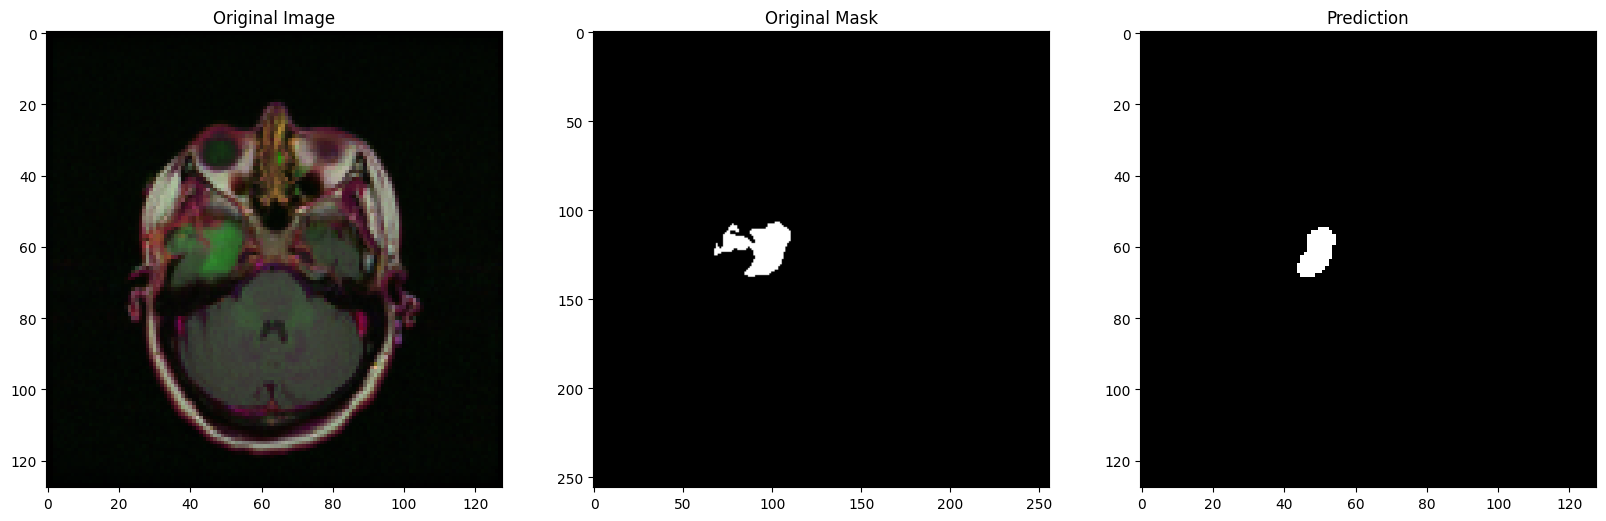

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


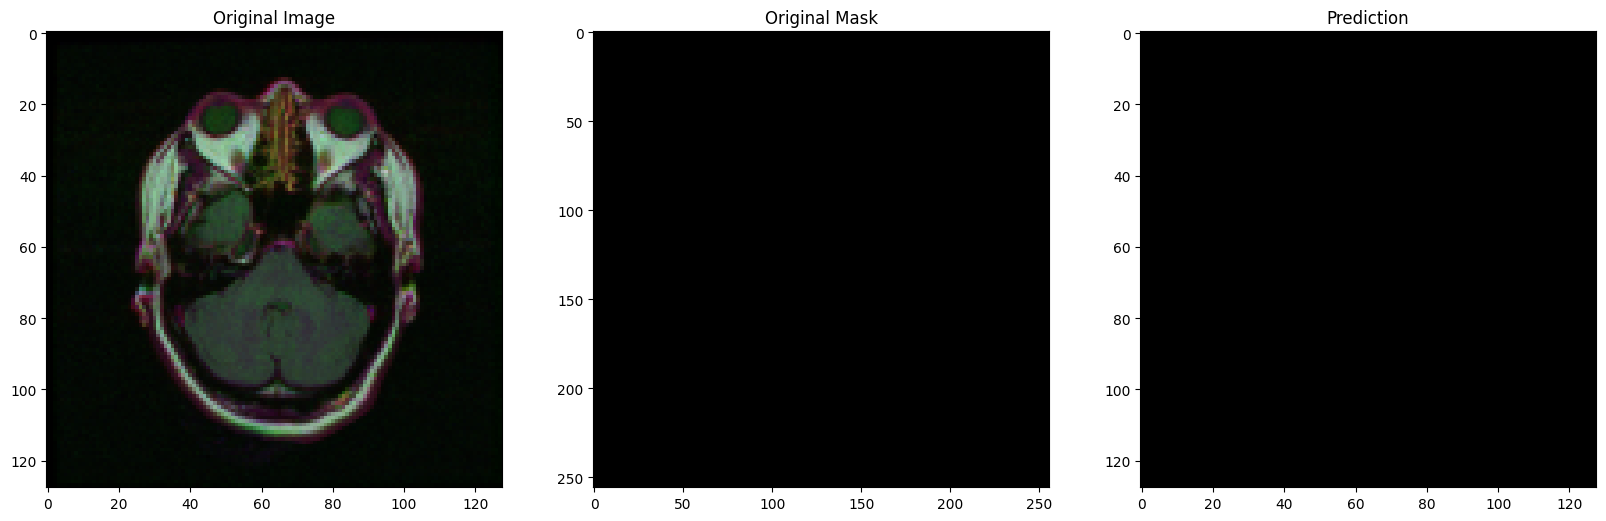

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


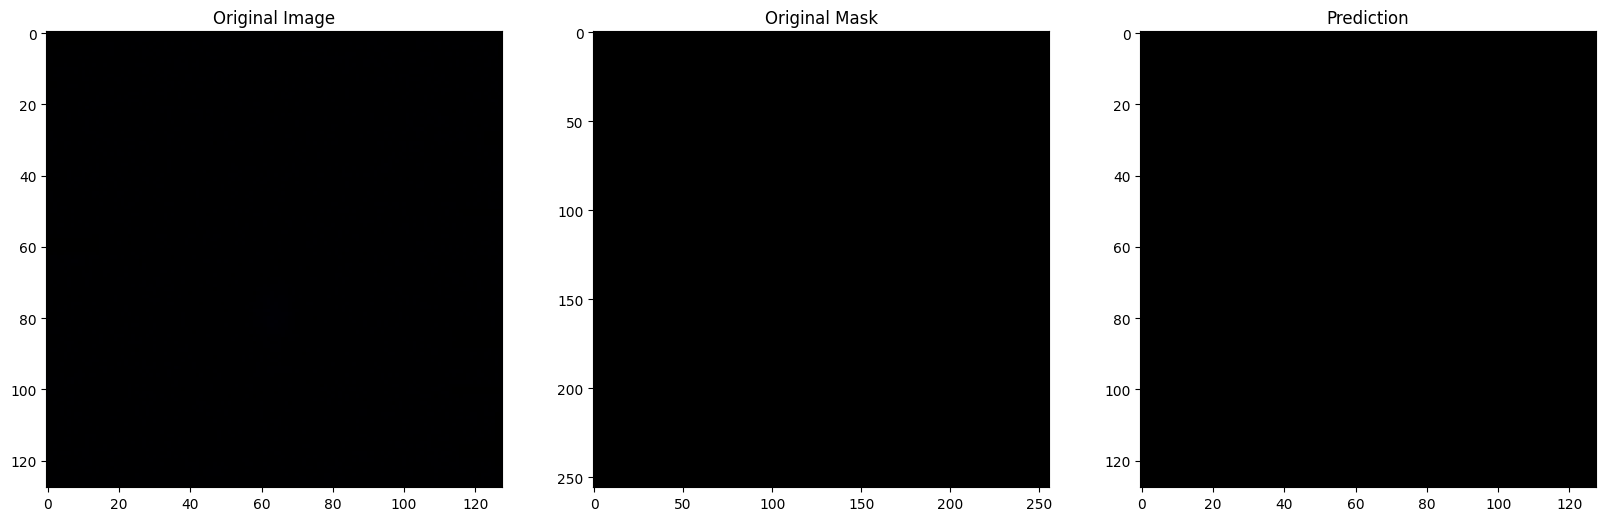

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


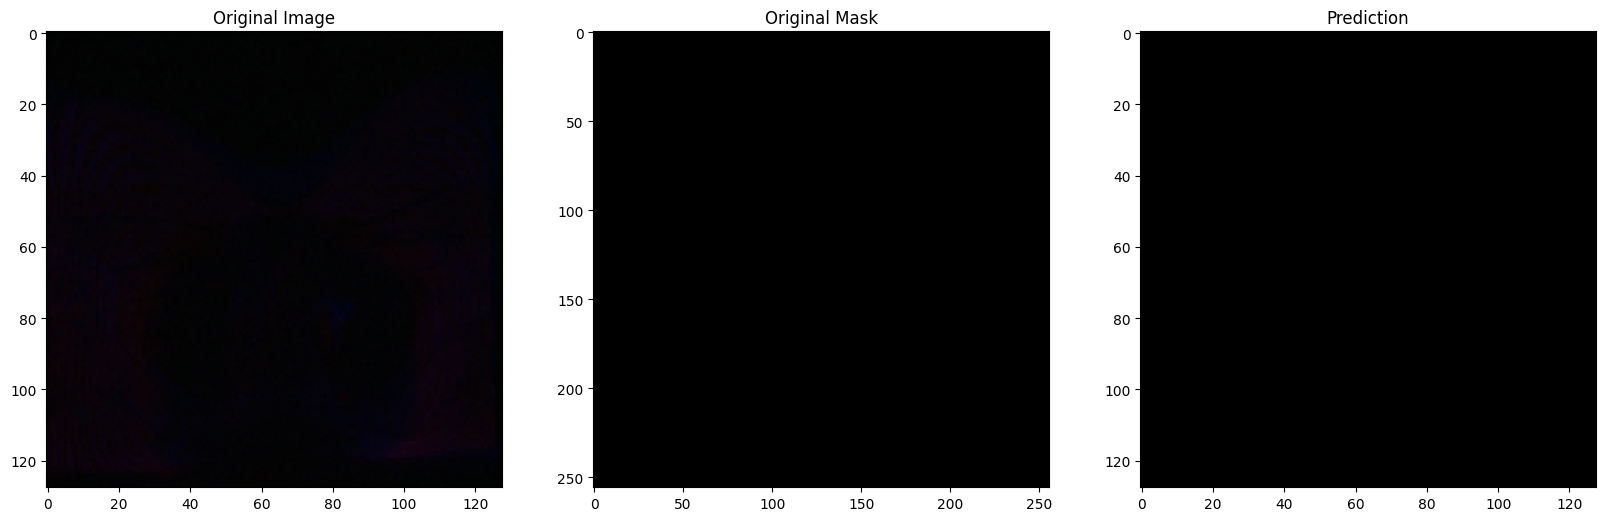

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


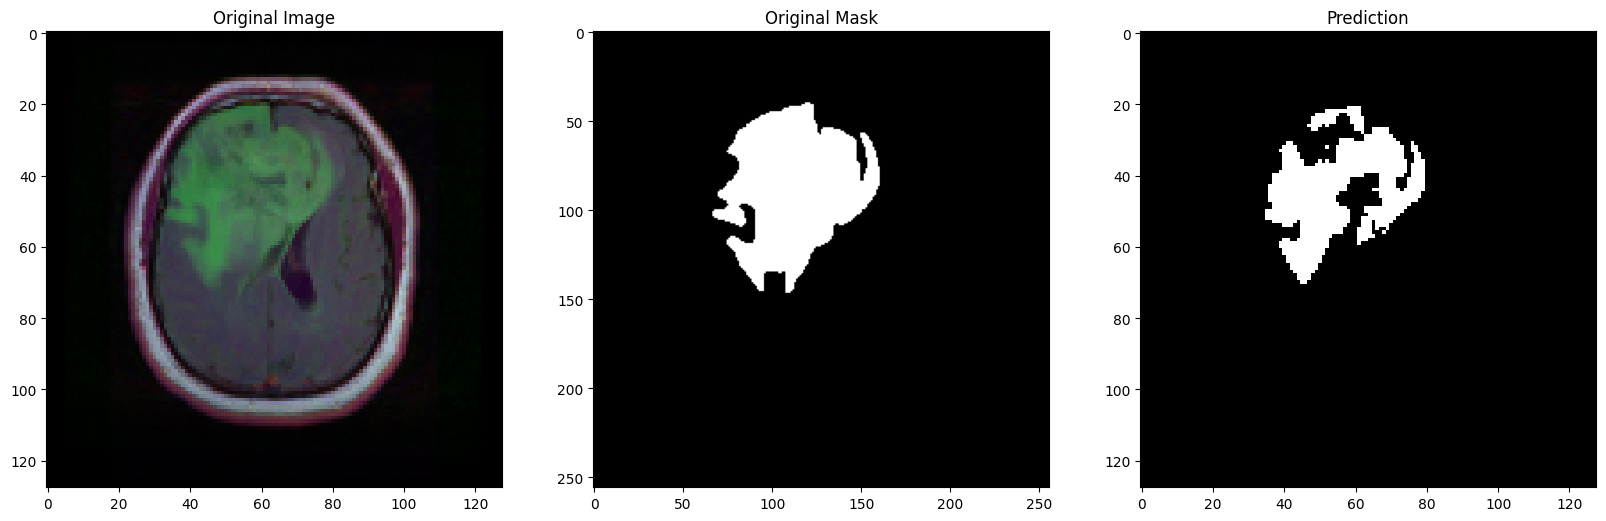

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


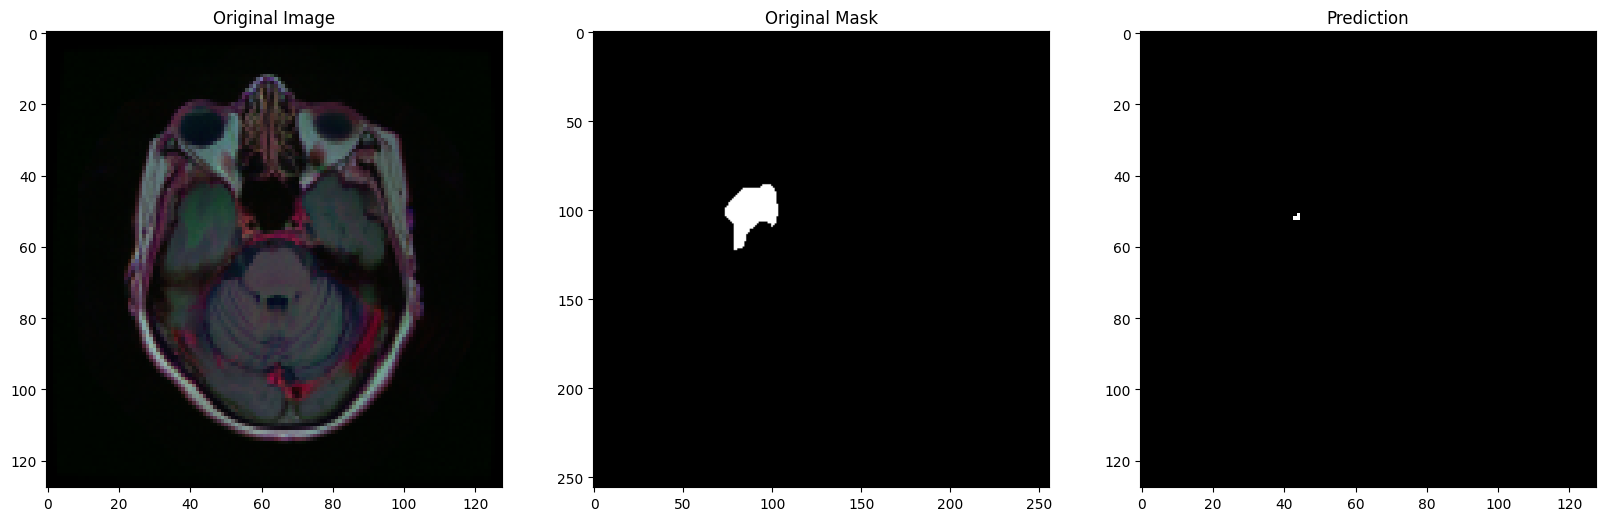

In [37]:
for i in range(50):
    
    index=np.random.randint(1,len(MRI_Test.index))
    img = cv2.imread(MRI_Test['img_path'].iloc[index])
    img = cv2.resize(img ,(128, 128))
    img = img / 255
    img = img[np.newaxis, :, :, :]#Increasing the dimensions for predictions
    pred=model_1.predict(img)
    
    
    plt.figure(figsize=(20,12))
    plt.subplot(1,3,1)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')
    plt.subplot(1,3,2)
    plt.imshow(np.squeeze(cv2.imread(MRI_Test['mask_path'].iloc[index]))) #Reducing dimensions
    plt.title('Original Mask')
    plt.subplot(1,3,3)
    plt.imshow(np.squeeze(pred) > .5,cmap='gray')
    plt.title('Prediction')
    plt.show()

In [38]:
test_ids = list(MRI_Test.img_path)
test_mask = list(MRI_Test.mask_path)

In [39]:
def prediction(test, model_seg):
  
    # empty list to store results
    mask, image_id,has_mask = [], [], []
    
    #itetrating through each image in test data
    for i in test.img_path:
        

        
        #Creating a empty array of shape 1,256,256,1
        X = np.empty((1,128,128,3))
        # read the image
        img = io.imread(i)
        #resizing the image and coverting them to array of type float64
        img = cv2.resize(img, (128, 128))
        img = np.array(img, dtype=np.float64)
        
        # standardising the image
        img -= img.mean()
        img /= img.std()
        #converting the shape of image from 256,256,3 to 1,256,256,3
        X[0,] = img
        
        #make prediction of mask
        predict = model_seg.predict(X)
        
        # if sum of predicted mask is 0 then there is not tumour
        if predict.round().astype(int).sum()==0:
            image_id.append(i)
            has_mask.append(0)
            mask.append('No mask :)')
        else:
        #if the sum of pixel values are more than 0, then there is tumour
            image_id.append(i)
            has_mask.append(1)
            mask.append(predict)
            
    return pd.DataFrame({'img_path': image_id,'predicted_mask': mask,'has_mask': has_mask})

In [40]:
Brain_MRI_Pred = prediction(MRI_Test, model_1)
Brain_MRI_Pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━

img_path predicted_mask  \
0    /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     No mask :)   
1    /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     No mask :)   
2    /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     No mask :)   
3    /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     No mask :)   
4    /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     No mask :)   
..                                                 ...            ...   
388  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     No mask :)   
389  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     No mask :)   
390  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     No mask :)   
391  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     No mask :)   
392  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     No mask :)   

     has_mask  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
388         0  
389         0  
390         0  
391         0  
392         0  

[393 rows x 3 columns]

In [41]:
Brain_MRI_Pred = MRI_Test.merge(Brain_MRI_Pred, on='img_path')
Brain_MRI_Pred.head()

img_path  \
0  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
1  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
2  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
3  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   
4  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...   

                                           mask_path  mask predicted_mask  \
0  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0     No mask :)   
1  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0     No mask :)   
2  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0     No mask :)   
3  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0     No mask :)   
4  /kaggle/input/lgg-mri-segmentation/kaggle_3m/T...     0     No mask :)   

   has_mask  
0         0  
1         0  
2         0  
3         0  
4         0

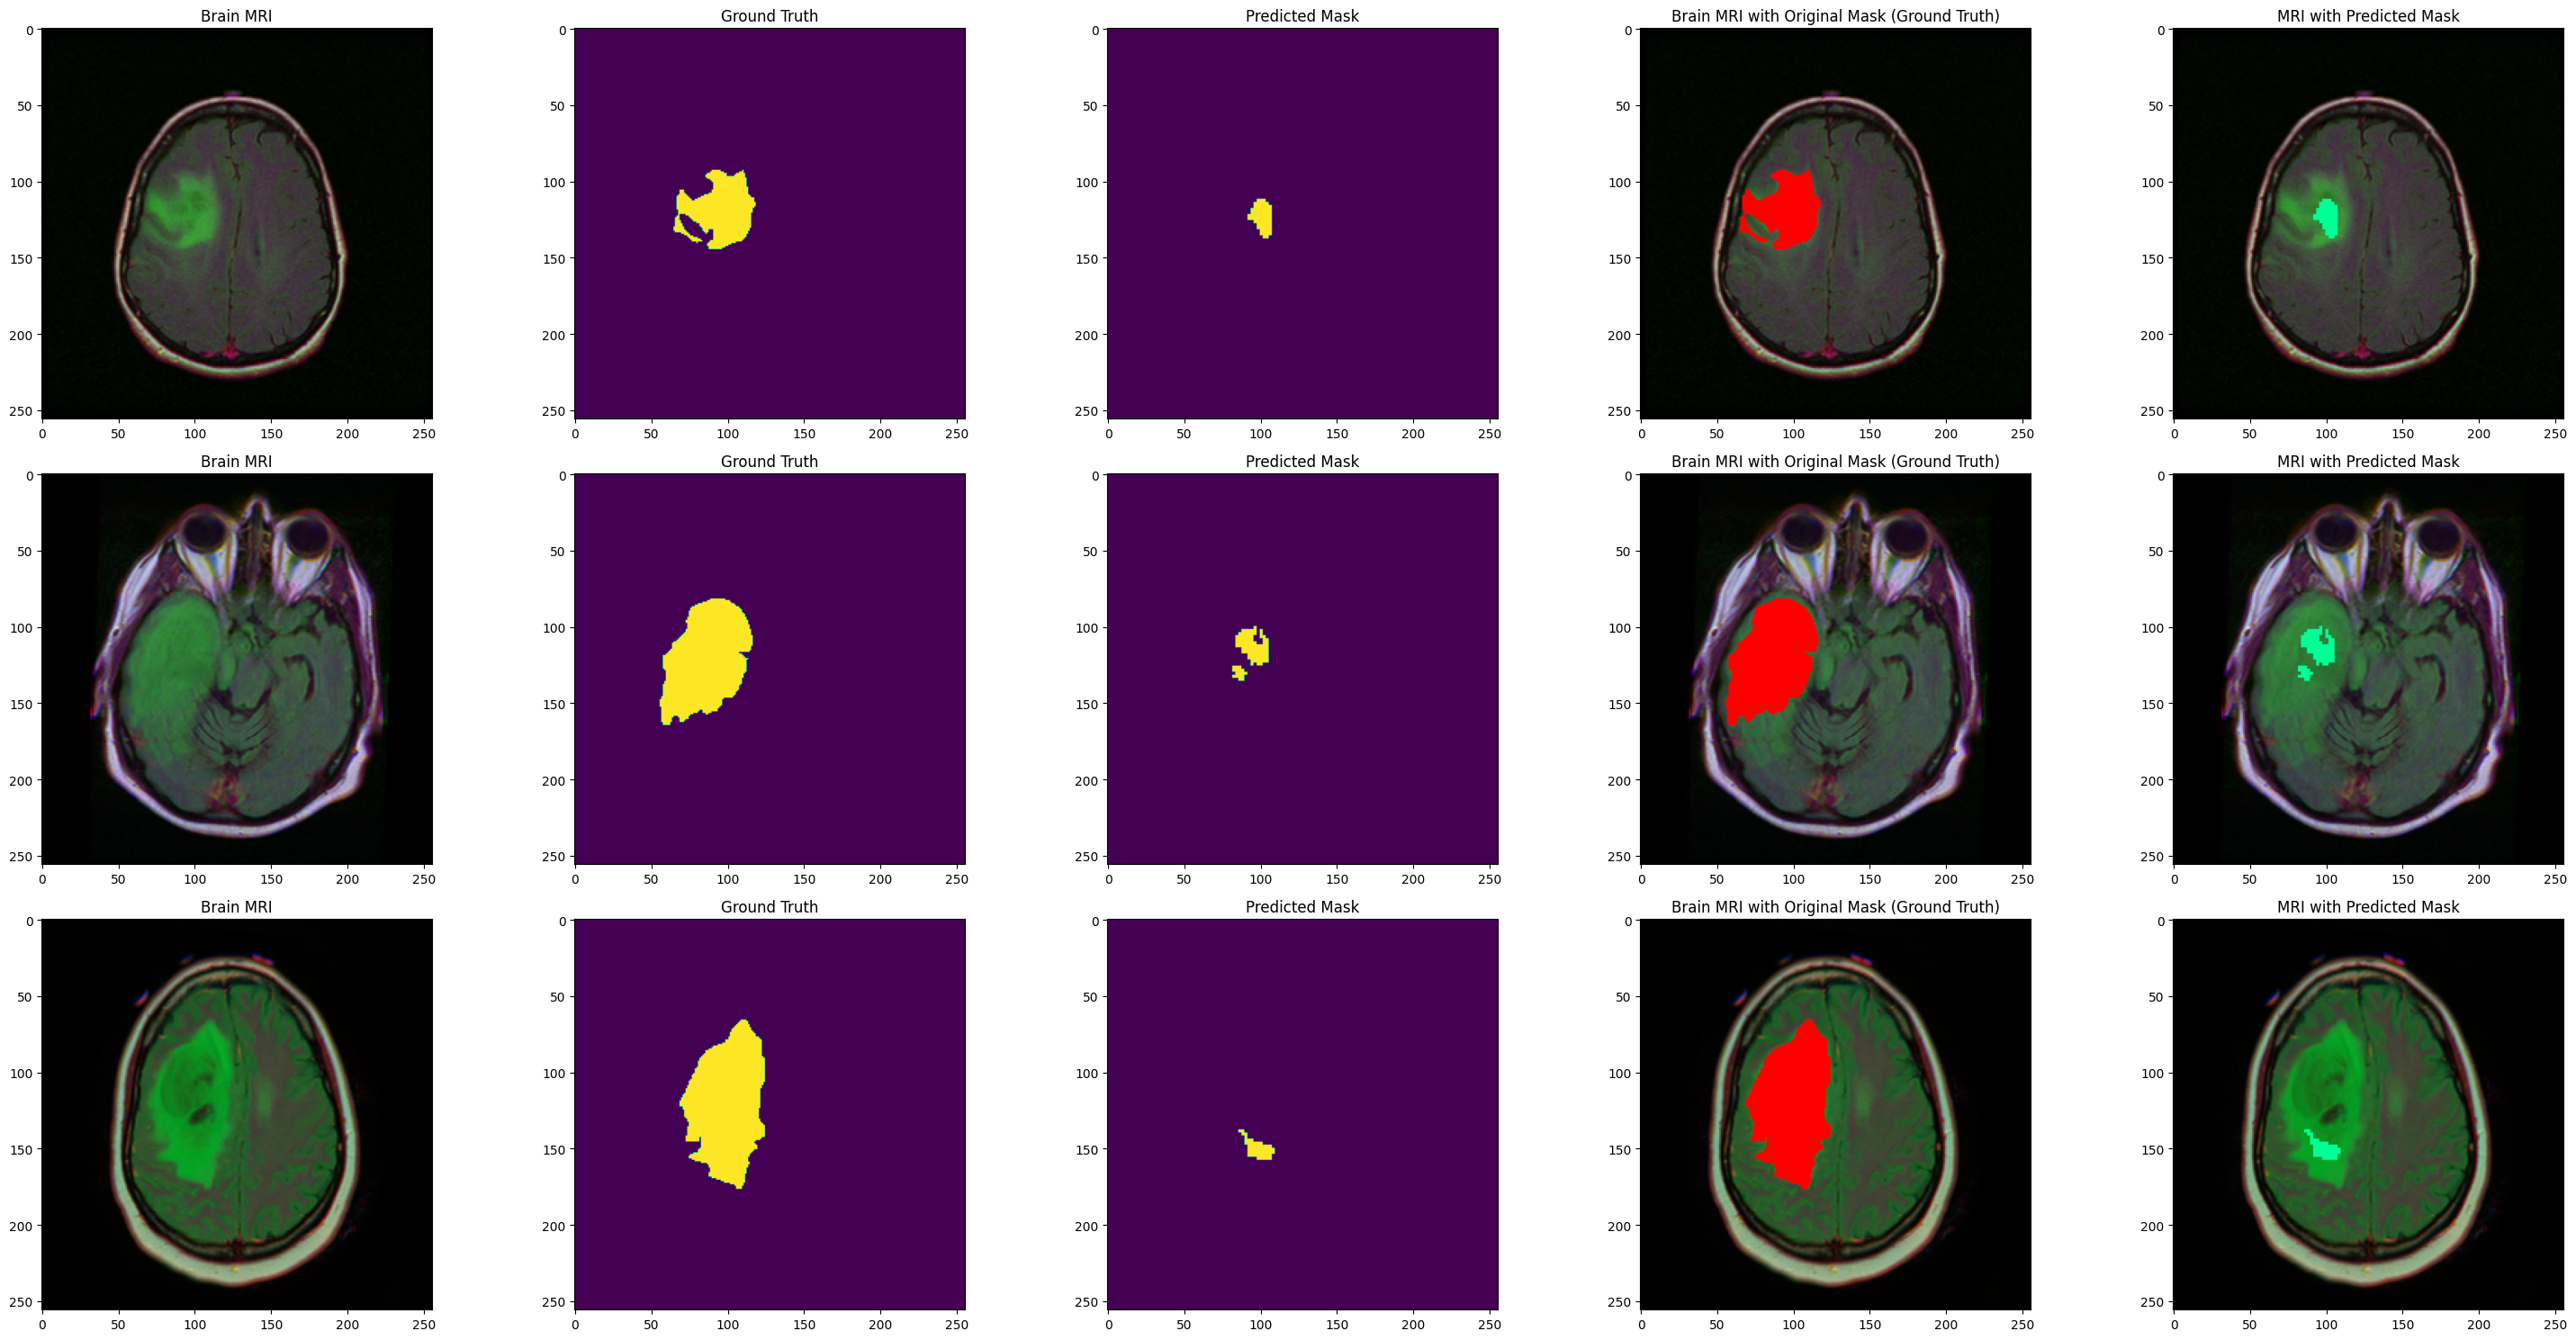

In [42]:

import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import cv2

count = 0
fig, axs = plt.subplots(3, 5, figsize=(30, 15))

for i in range(len(Brain_MRI_Pred)):
    if Brain_MRI_Pred.has_mask[i] == 1 and count < 15:
        
        # Read MRI images
        img = io.imread(Brain_MRI_Pred.img_path[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[count][0].imshow(img)
        axs[count][0].title.set_text('Brain MRI')
        
        # Read original mask
        mask = io.imread(Brain_MRI_Pred.mask_path[i])
        axs[count][1].imshow(mask)
        axs[count][1].title.set_text('Ground Truth')
        
        # Read predicted mask
        pred = np.array(Brain_MRI_Pred.predicted_mask[i]).squeeze().round()
        
        # Resize predicted mask to match original image dimensions
        pred_resized = cv2.resize(pred, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
        axs[count][2].imshow(pred_resized)
        axs[count][2].title.set_text('Predicted Mask')
        
        # Overlay original mask with MRI
        img_with_gt_mask = img.copy()
        img_with_gt_mask[mask == 255] = (255, 0, 0)
        axs[count][3].imshow(img_with_gt_mask)
        axs[count][3].title.set_text('Brain MRI with Original Mask (Ground Truth)')
        
        # Overlay predicted mask and MRI
        img_with_pred_mask = img.copy()
        img_with_pred_mask[pred_resized == 1] = (0, 255, 150)
        axs[count][4].imshow(img_with_pred_mask)
        axs[count][4].title.set_text('MRI with Predicted Mask')
        
        count += 1
        if count == 3:
            break

fig.tight_layout()
plt.show()


In [43]:
model_history.history.keys()

dict_keys(['accuracy', 'binary_crossentropy', 'dice_coef', 'iou_coef', 'loss', 'val_accuracy', 'val_binary_crossentropy', 'val_dice_coef', 'val_iou_coef', 'val_loss', 'learning_rate'])

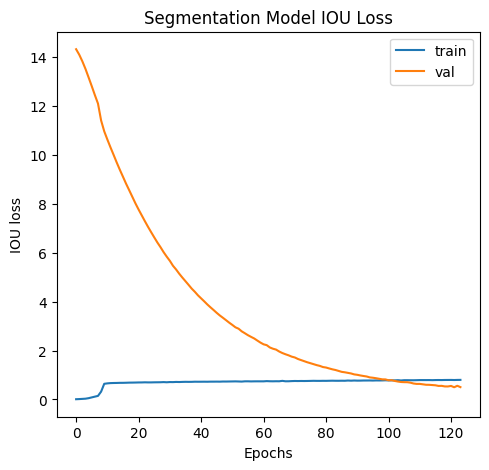

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(model_history.history['iou_coef']);
plt.plot(model_history.history['val_loss']);
plt.title("Segmentation Model IOU Loss");
plt.ylabel("IOU loss");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

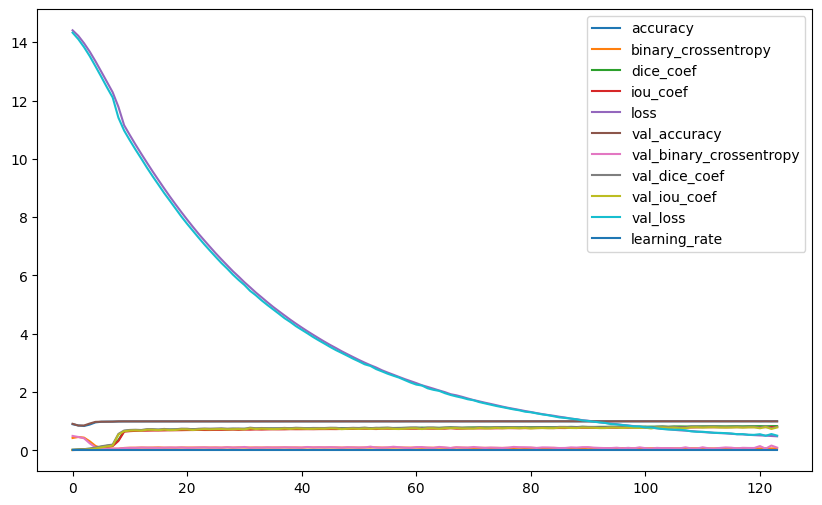

In [45]:
plt.figure(figsize=[10,6])
for key in model_history.history.keys():
    plt.plot(model_history.history[key], label=key)
    
plt.legend()
plt.show()